# <font color='red'> Project Deep Learnning</font>


## <font color='red'> Movie Genres Classification from their Poster Image using CNNs</font>
#### <font color='blue'> Problem Description </font> 
This project has the aim to achieve movie genre classication based only on movie poster images.
For movie viewers, movie posters are one of the first impressions used to get an idea about the movie content and its genre. Humans can get an idea based on things like color, objects, expressions on the faces of actors etc to quickly determine the genre (horror, comedy, animation etc).
If humans are more or less able to predict genre of a movie only giving a look at its poster, then we can assume that the poster possesses some characteristics which could be utilized in machine learning algorithms to predict its genre

#### <font color='blue'> Proposed Approach </font> 
In order to do that a Deep Neural Network (Convolutional Neural Network) is constructed to classify a given movie poster image into genres. Since a movie may belong to multiple genres, this is a multi-label image classication problem.

## <font color='blue'> Step 1: Webscraping use Spyder</font>

we use a Webscraping Approach in order to retrieve movie poster images.

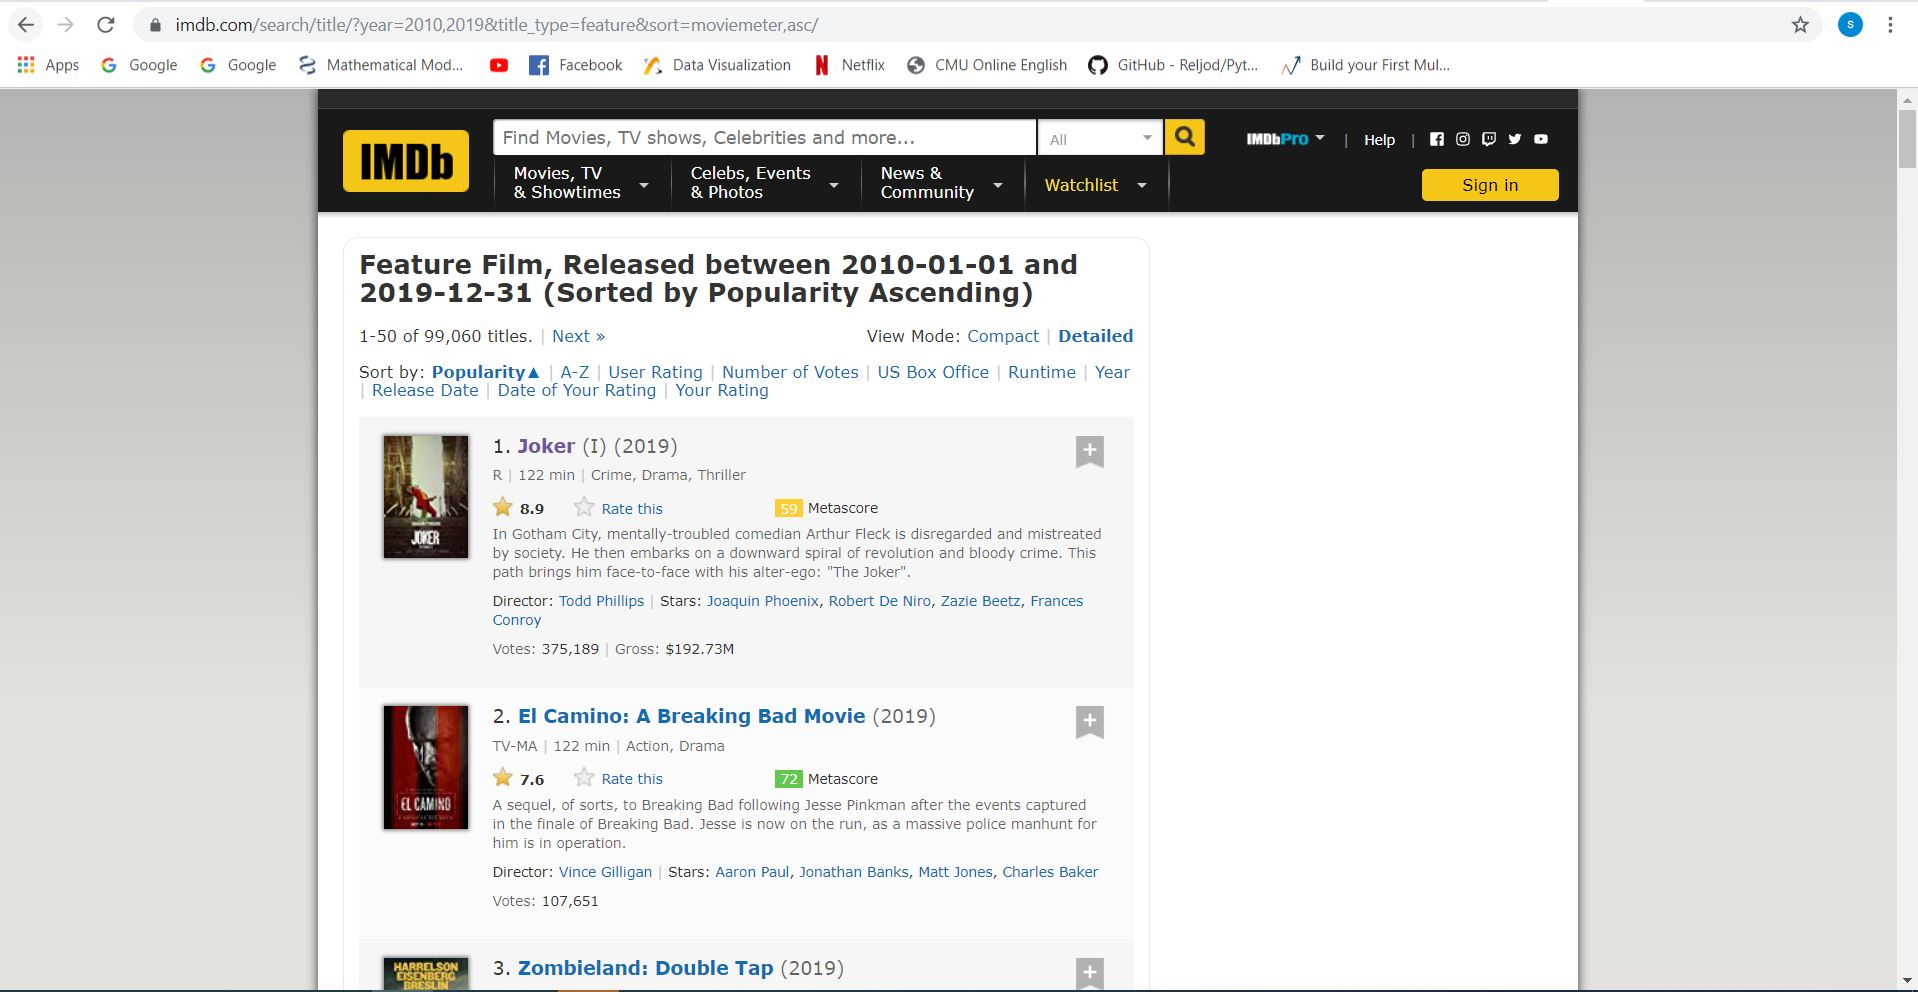

In [ ]:
from IPython.display import display, Image
display(Image(filename='a1.jpg'))


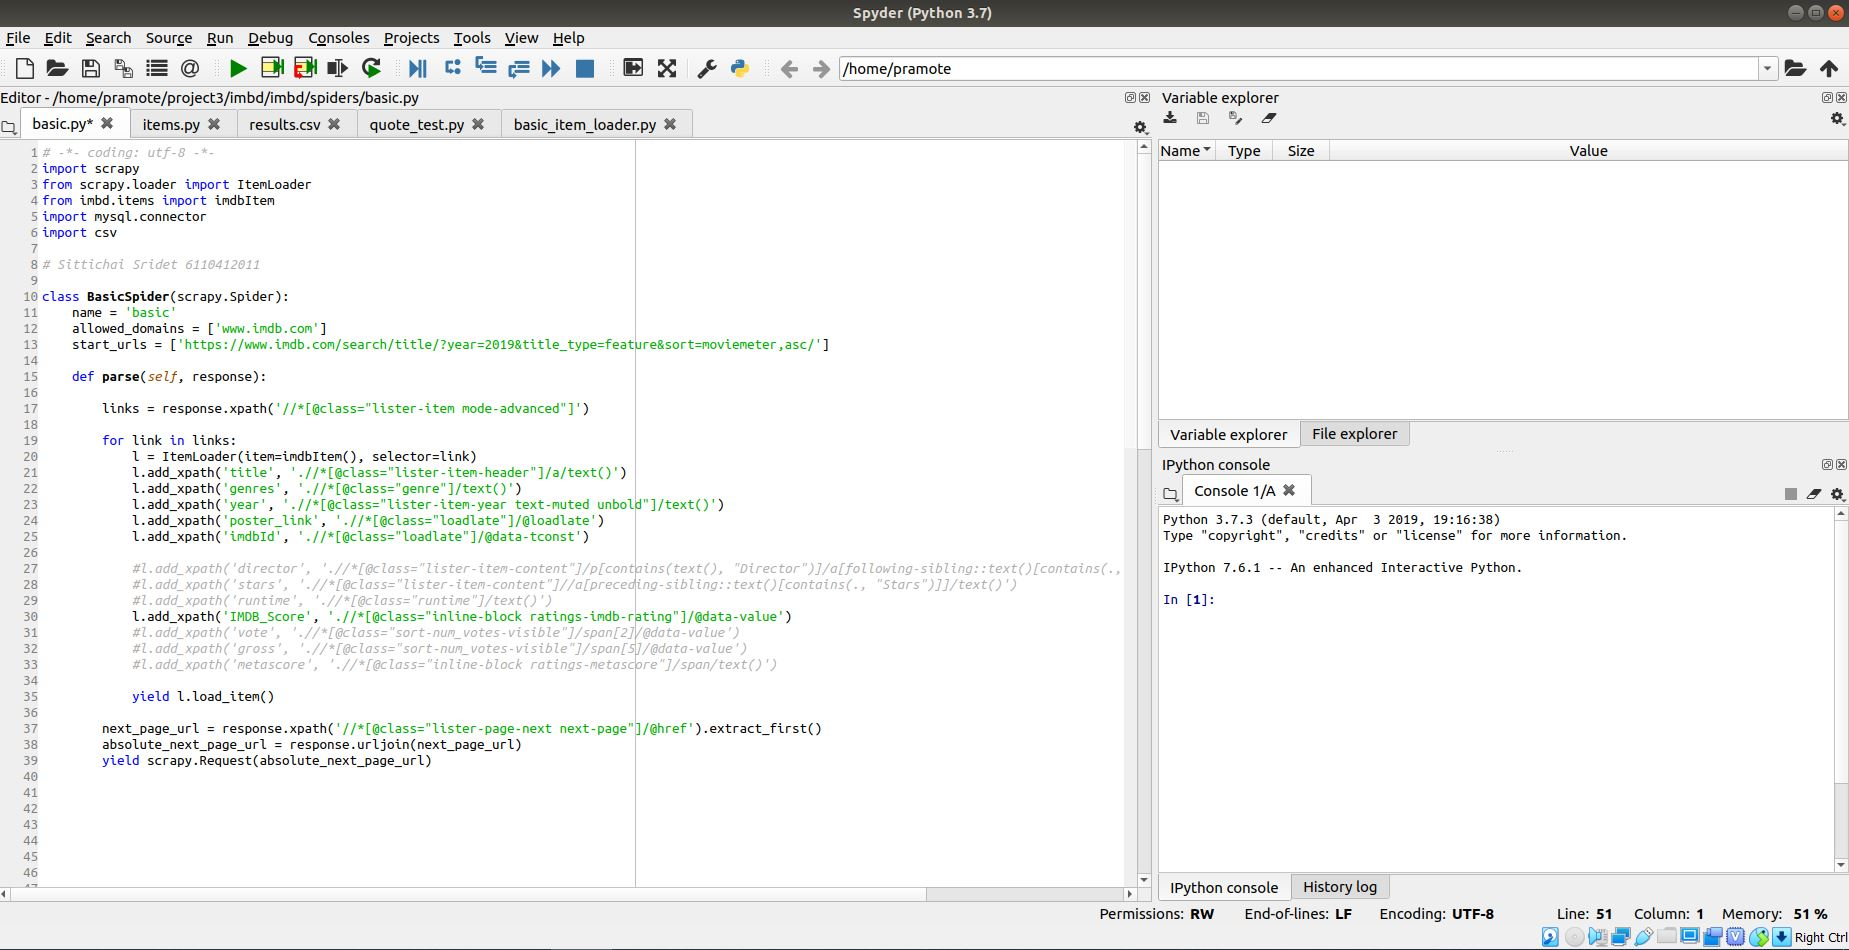

In [ ]:
from IPython.display import display, Image
display(Image(filename='capture1.jpg'))


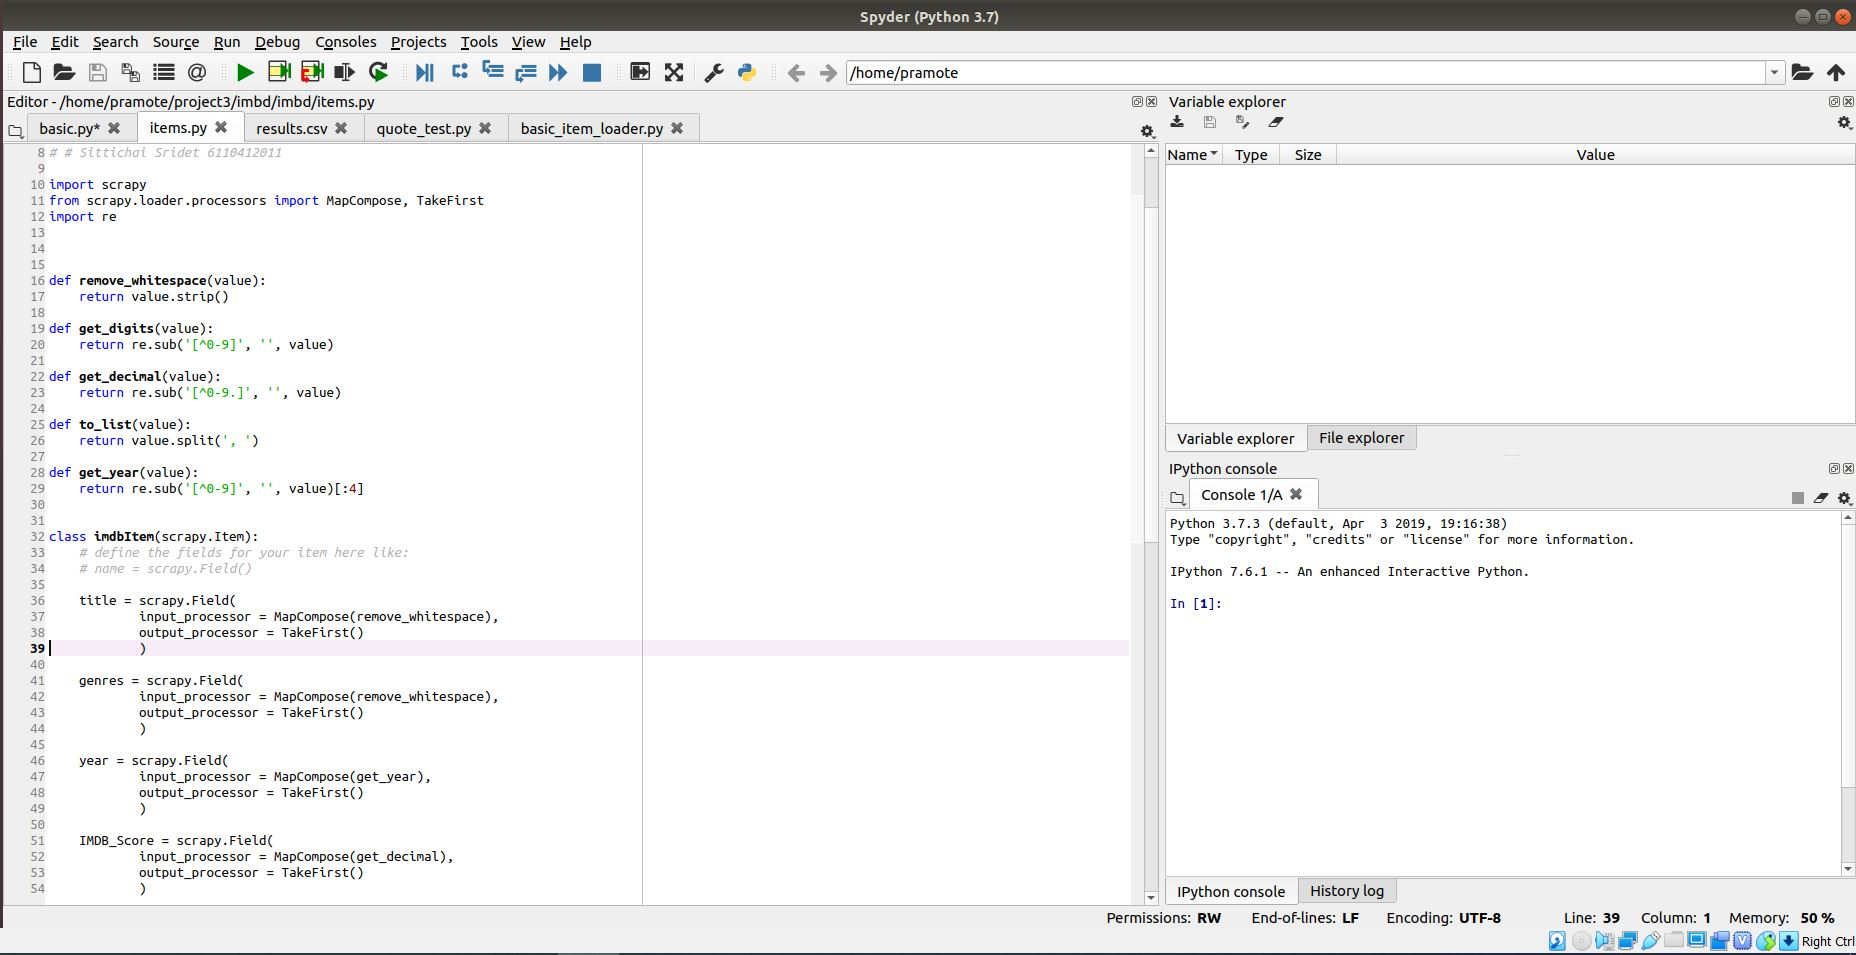

In [ ]:
from IPython.display import display, Image
display(Image(filename='capture2.jpg'))

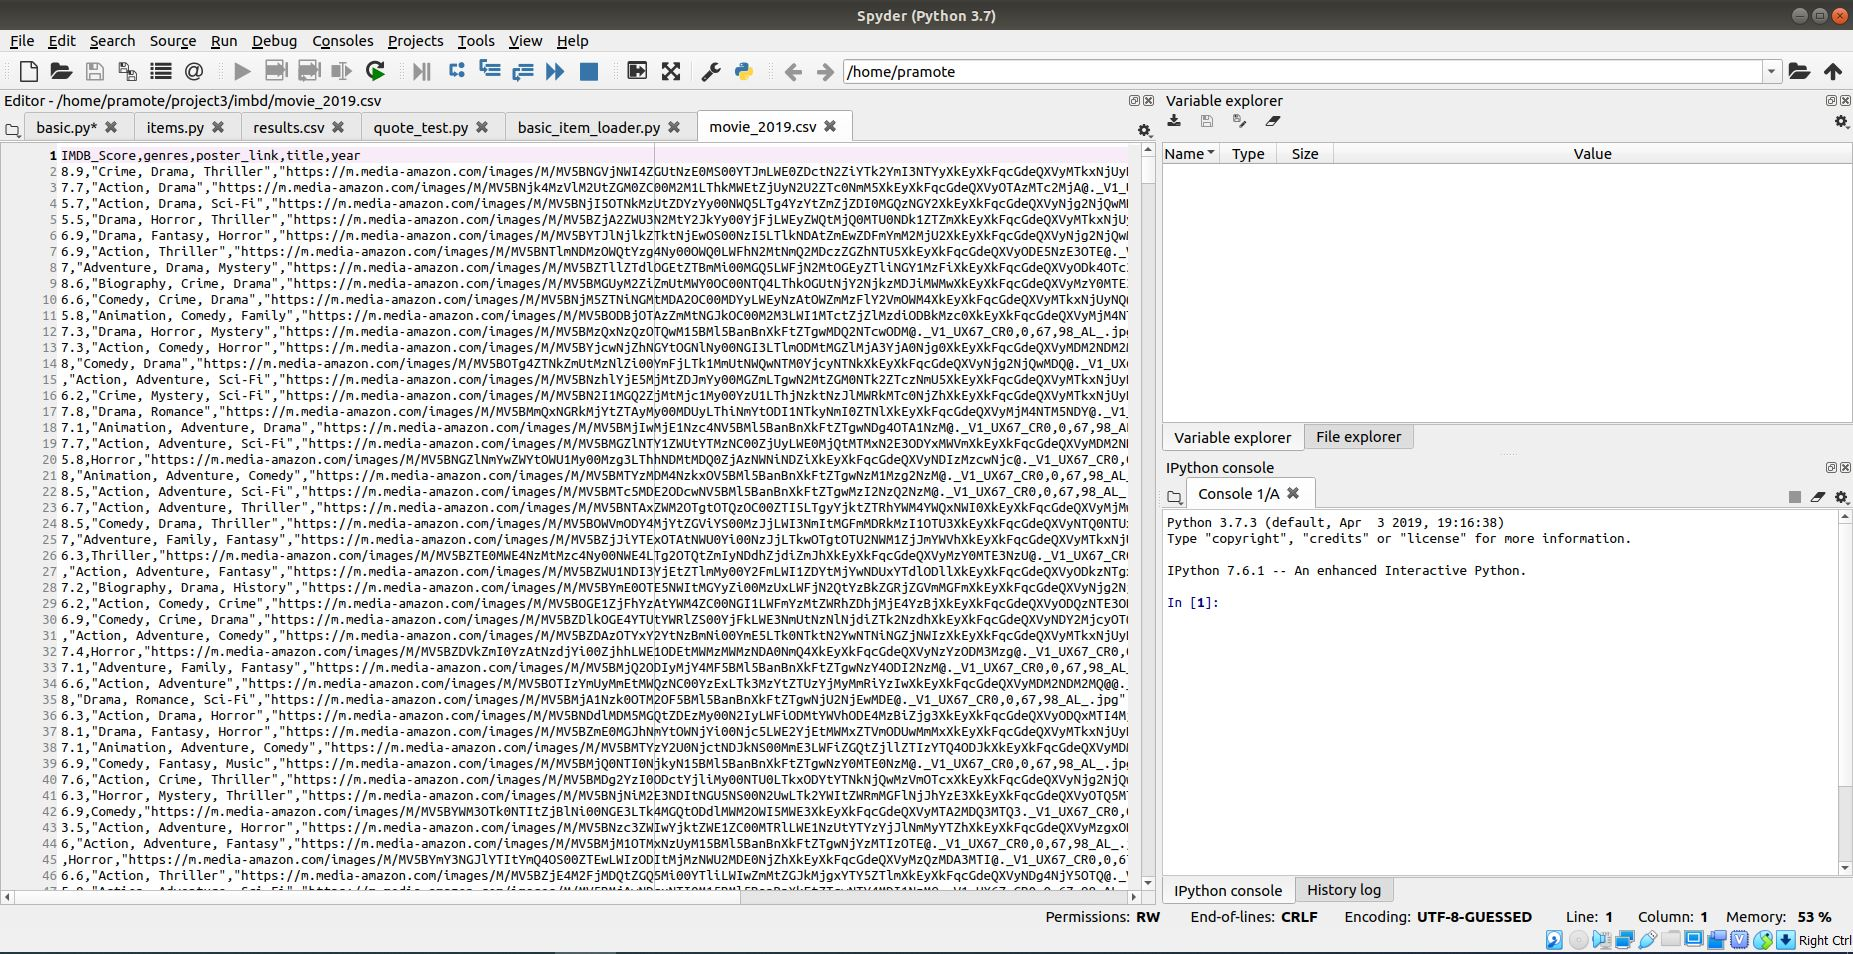

In [ ]:
from IPython.display import display, Image
display(Image(filename='capture3.jpg'))

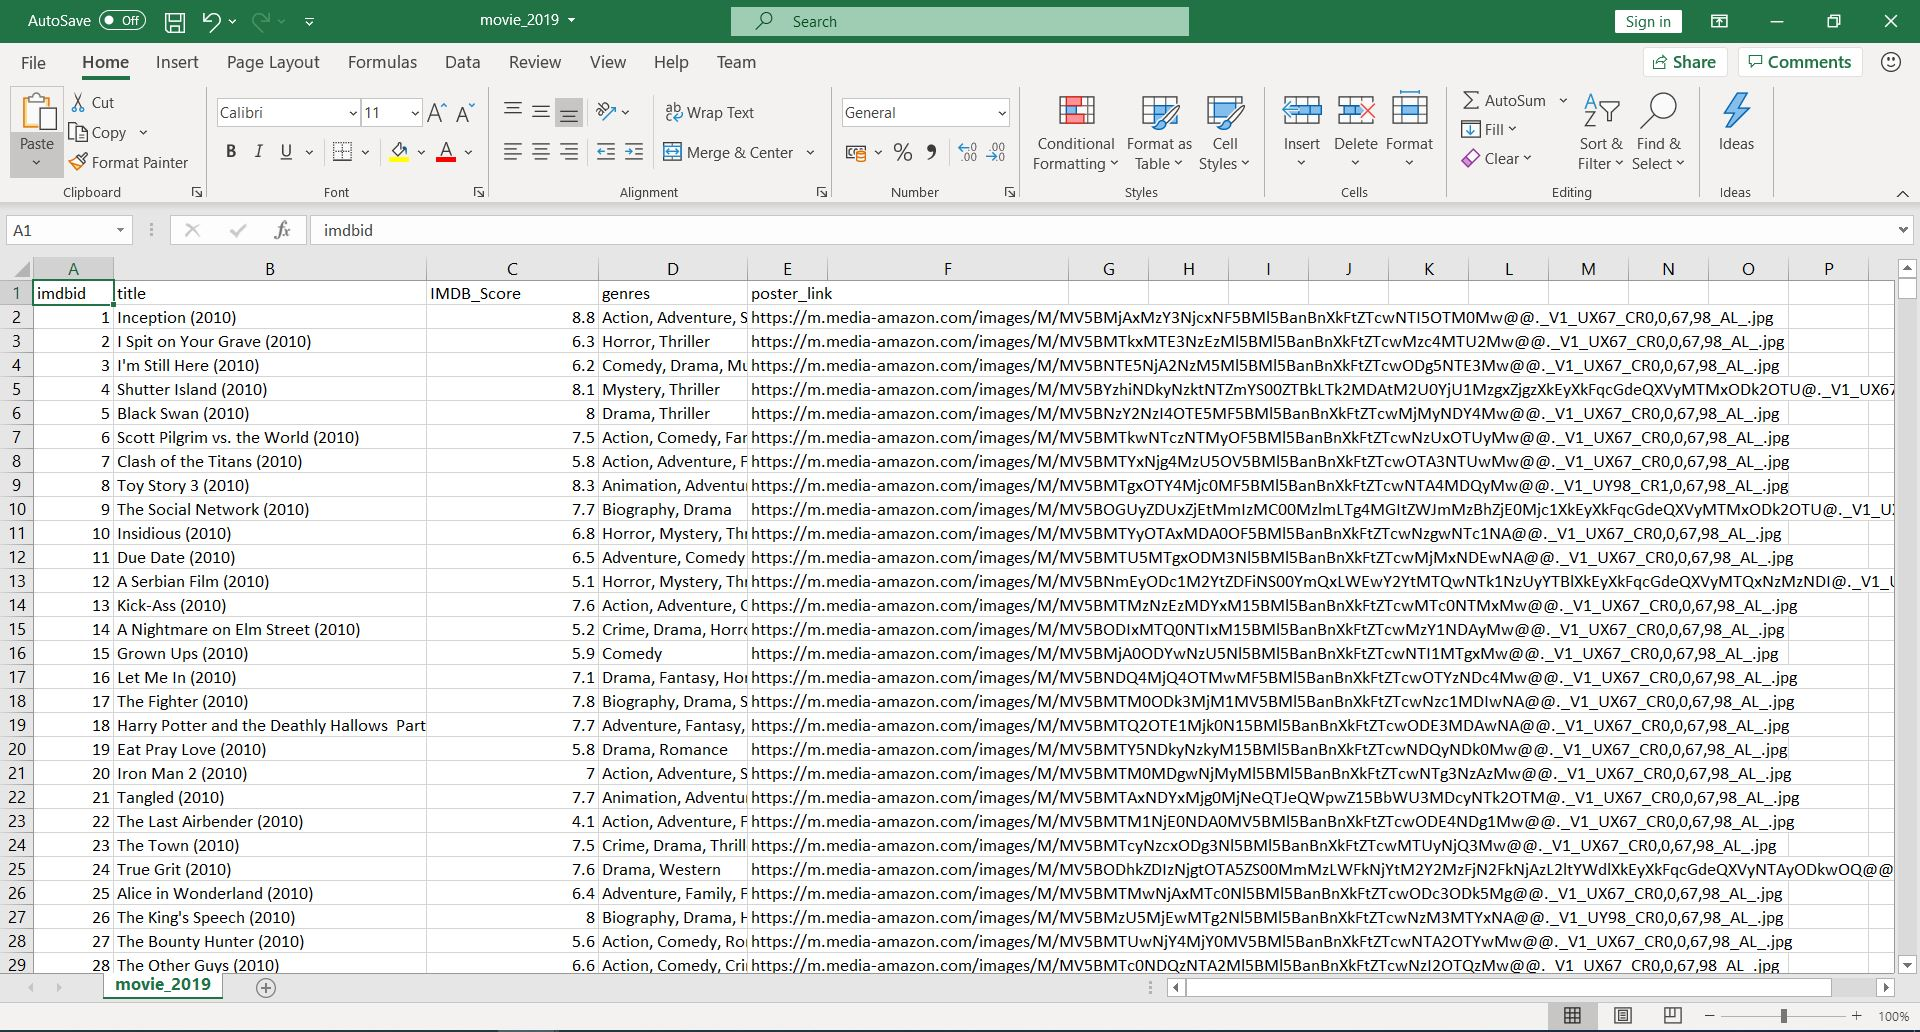

In [ ]:
from IPython.display import display, Image
display(Image(filename='capture4.jpg'))

## <font color='blue'> Step 2: Posters Download</font>

 Once the Webscraping step is completed, we have also poster image links in our dataset. So now we are able to download poster images using those links. Before doing that, we apply a simple step of data cleaning to the dataset, consisting in dropping all entries without a defined genre.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [ ]:
import numpy as np
import pandas as pd
import glob
import scipy.misc
import imageio
import skimage
from tqdm import tqdm
import requests  
import re
from bs4 import BeautifulSoup  
from urllib.request import urlretrieve
import ast 
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv('movie_2019.csv')    # reading the csv file
data.head() 

,imdbid,title,IMDB_Score,genres,poster_link
0,1,Inception (2010),8.8,"Action, Adventure, Sci-Fi",https://m.media-amazon.com/images/M/MV5BMjAxMz...
1,2,I Spit on Your Grave (2010),6.3,"Horror, Thriller",https://m.media-amazon.com/images/M/MV5BMTkxMT...
2,3,I'm Still Here (2010),6.2,"Comedy, Drama, Music",https://m.media-amazon.com/images/M/MV5BNTE5Nj...
3,4,Shutter Island (2010),8.1,"Mystery, Thriller",https://m.media-amazon.com/images/M/MV5BYzhiND...
4,5,Black Swan (2010),8.0,"Drama, Thriller",https://m.media-amazon.com/images/M/MV5BNzY2Nz...


In [ ]:
from os import listdir
from PIL import Image
import csv
import os
import urllib.request
from bs4 import BeautifulSoup
import re

   
row_names = ['imdbid', 'poster_link']
with open('movie_2019.csv', 'r', newline='', encoding = 'utf8') as in_csv:
    reader = csv.reader(in_csv, delimiter=',')
    next(reader)
    i = 1
    for row in reader:

        imdbid = row[0]
        title_movie = r'{:}'.format('file_poster1/'+str(imdbid)+'.jpg')
        
        poster_link = row[4]
        
        result=''
        try:
            result = urlretrieve(poster_link, title_movie)
        except:
            print('error', poster_link)
            #os.remove(title_jpg)
        print(i, "-->", result)
        i += 1

In [ ]:
from os import listdir
from PIL import Image

savelocation = 'file_poster1/'
for filename in listdir(savelocation):
    if filename.endswith('.jpg'):
        try:
            img = Image.open(savelocation+filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename) # print out the names of corrupt files

## <font color='blue'> Step 3: Dataset Manipulation and Preparation </font>

Before constructing our Machine Learning model, we manipulate the dataset obtained from previous steps in order to increase our model performances.

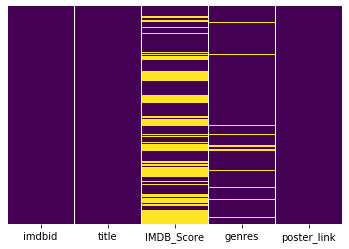

In [ ]:
import seaborn as sns

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
data['genres'].replace(' ', np.nan, inplace=True)
data.dropna(inplace=True)

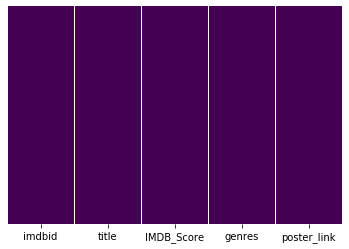

In [ ]:
import seaborn as sns

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
dataset = data.drop(['title','IMDB_Score','poster_link'], axis = 1)
dataset.head(5)

,imdbid,genres
0,1,"Action, Adventure, Sci-Fi"
1,2,"Horror, Thriller"
2,3,"Comedy, Drama, Music"
3,4,"Mystery, Thriller"
4,5,"Drama, Thriller"


In [ ]:
dataset['genres'].replace('', np.nan, inplace=True)
dataset.dropna(inplace=True)
len(dataset)

57157

## <font color='red'> check imbalance data</font>

In [ ]:
label_dict = {"word2idx": {}, "idx2word": []}
idx = 0
genre_per_movie = dataset["genres"].apply(lambda x: str(x).split(", ")[:-1])
for l in [g for d in genre_per_movie for g in d]:
    if l in label_dict["idx2word"]:
        pass
    else:
        label_dict["idx2word"].append(l)
        label_dict["word2idx"][l] = idx
        idx += 1
n_classes = len(label_dict["idx2word"])

In [ ]:
def genre_count(df, label_dict):
    max_genre = 0
    for label in label_dict["idx2word"]:
        occurrences = len((df[df['genres'].str.contains(label)]))
        print(label, occurrences)
        if occurrences > max_genre:
            max_genre = occurrences
    return max_genre

In [ ]:
max_genre_data = genre_count(dataset, label_dict)

Action 6992
Adventure 3222
Horror 7863
Comedy 17200
Drama 30002
Mystery 3035
Animation 1677
Biography 1295
Crime 4418
Fantasy 2180
Family 2898
Music 1622
Romance 6779
Sci-Fi 2224
History 1187
Thriller 8408
Musical 675
News 26
Sport 624
War 635
Game-Show 2
Reality-TV 8


 <font color='red'> In this way we are facing the imbalance problem through an oversampling approach, which consists in adding instances of less frequent classes in order to balance the dataset. </font>

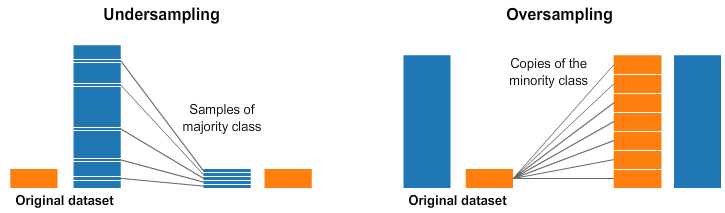

In [ ]:
from IPython.display import display, Image
display(Image(filename='c2.png'))

In [ ]:
df_movietotal_copy = dataset.copy()

In [ ]:
df_movietotal = dataset.sample(frac=.25)
df_movietotal_copy = pd.concat([df_movietotal, df_movietotal_copy]).drop_duplicates(keep=False)

In [ ]:
max_genre = genre_count(df_movietotal, label_dict)

Action 1712
Adventure 805
Horror 1993
Comedy 4337
Drama 7482
Mystery 761
Animation 416
Biography 327
Crime 1142
Fantasy 508
Family 727
Music 387
Romance 1733
Sci-Fi 534
History 298
Thriller 2149
Musical 150
News 9
Sport 173
War 152
Game-Show 0
Reality-TV 1


In [ ]:
# IMBALANCE: OVERSAMPLING SOLUTION
df_movietotal_copy = df_movietotal_copy[~df_movietotal_copy["genres"].str.contains("Comedy")]
df_movietotal_copy = df_movietotal_copy[~df_movietotal_copy["genres"].str.contains("Drama")]
    

In [ ]:
for label in label_dict["idx2word"]:
    if label not in ["Drama", "Comedy"]:
        len_genre = len(df_movietotal[df_movietotal['genres'].str.contains(label)])
        #print('len_genre',len_genre)
        df_genre = df_movietotal_copy[df_movietotal_copy['genres'].str.contains(label)]
        #print('len_genre',len_genre)
        #df_genre['genres'] = [label+"," for i in range (0, len(df_genre))]    
        if (max_genre - len_genre) > 0:
            if len_genre > 7000:
                param = 0
            elif len_genre > 4000:
                param = 0.3
            elif len_genre > 2000:
                param = 0.6
            else:
                param = 0.9
            df_class_over = df_genre.sample(int((max_genre-len_genre)*param)+1, replace=True)
            df_movietotal = pd.concat([df_movietotal, df_class_over], axis=0)

print('Random over-sampling:')
print(genre_count(df_movietotal, label_dict))

Random over-sampling:
Action 18952
Adventure 14205
Horror 12510
Comedy 4337
Drama 7482
Mystery 9593
Animation 7793
Biography 8074
Crime 6644
Fantasy 6925
Family 7715
Music 9616
Romance 6990
Sci-Fi 6278
History 7918
Thriller 14627
Musical 5886
News 6736
Sport 6780
War 6829
Game-Show 6734
Reality-TV 6734
18952


In [ ]:
len(df_movietotal)

101118

## <font color='blue'> Step 4: Poster Images Preprocessing and Final Dataset Construction </font>



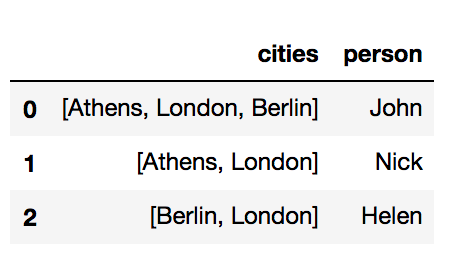

In [ ]:
from IPython.display import display, Image
display(Image(filename='c3.png'))

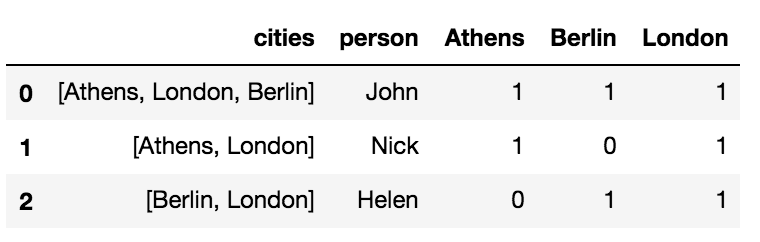

In [ ]:
from IPython.display import display, Image
display(Image(filename='c4.png'))

In [ ]:
genres_df = pd.DataFrame(df_movietotal['genres'].apply(lambda x : x.split(', ')).tolist())
genres_df.head()

,0,1,2
0,Comedy,Fantasy,Musical
1,Drama,None,None
2,History,None,None
3,Comedy,Drama,None
4,Comedy,Horror,None


In [ ]:
genres_obj = genres_df.stack()


In [ ]:
genres_df = pd.get_dummies(genres_obj)
genres_df.head()

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0 0       0          0          0          0       1      0      0       0   
  1       0          0          0          0       0      0      0       0   
  2       0          0          0          0       0      0      0       0   
1 0       0          0          0          0       0      0      1       0   
2 0       0          0          0          0       0      0      0       0   

     Fantasy  Game-Show  ...  Musical  Mystery  News  Reality-TV  Romance  \
0 0        0          0  ...        0        0     0           0        0   
  1        1          0  ...        0        0     0           0        0   
  2        0          0  ...        1        0     0           0        0   
1 0        0          0  ...        0        0     0           0        0   
2 0        0          0  ...        0        0     0           0        0   

     Sci-Fi  Sport  Thriller  War  Western  
0 0       0      0         0    0        0  
  1       0      0         0    0        0  
  2       0      0         0    0        0  
1 0       0      0         0    0        0  
2 0       0      0         0    0        0  

[5 rows x 23 columns]

In [ ]:
genres_df = genres_df.sum(level=0)
genres_df.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Game-Show,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movie = pd.concat([dataset, genres_df], axis=1)
df_movie.head()

,imdbid,genres,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,"Action, Adventure, Sci-Fi",0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,"Horror, Thriller",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,"Comedy, Drama, Music",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,"Mystery, Thriller",0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,"Drama, Thriller",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movie[np.isnan(df_movie['imdbid'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43961 entries, 267 to 101117
Data columns (total 25 columns):
imdbid        0 non-null float64
genres        0 non-null object
Action        43961 non-null uint8
Adventure     43961 non-null uint8
Animation     43961 non-null uint8
Biography     43961 non-null uint8
Comedy        43961 non-null uint8
Crime         43961 non-null uint8
Drama         43961 non-null uint8
Family        43961 non-null uint8
Fantasy       43961 non-null uint8
Game-Show     43961 non-null uint8
History       43961 non-null uint8
Horror        43961 non-null uint8
Music         43961 non-null uint8
Musical       43961 non-null uint8
Mystery       43961 non-null uint8
News          43961 non-null uint8
Reality-TV    43961 non-null uint8
Romance       43961 non-null uint8
Sci-Fi        43961 non-null uint8
Sport         43961 non-null uint8
Thriller      43961 non-null uint8
War           43961 non-null uint8
Western       43961 non-null uint8
dtypes: float64(1)

In [ ]:
df_movie.dropna(inplace = True)

We will build a model that will return the genre of a given movie poster. But before that, do you remember the first step for building any image classification model?

That’s right – loading and preprocessing the data. So, let’s read in all the training images

We will remove the Id and genre columns from the train file and convert the remaining columns to an array which will be the target for our images:

In [ ]:
train_image = []
y = []
for i in tqdm(range(df_movie.shape[0])):
    img = ''
    try :
        img = image.load_img('file_poster2/'+str(int(df_movie['imdbid'][i]))+'.jpg',target_size=(150,150,3))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        y.append(np.array(df_movie.drop(['imdbid', 'genres'],axis=1).iloc[i]))
        
    except :
        print('error')
    #train_image.append(img)
    
        
X = np.array(train_image)
y = np.array(y)

  0%|▎                                                                            | 258/57157 [00:02<08:16, 114.56it/s]

error


  1%|█                                                                            | 749/57157 [00:05<06:37, 142.04it/s]

error


  2%|█▌                                                                          | 1190/57157 [00:08<05:12, 179.32it/s]C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
  2%|█▋                                                                          | 1262/57157 [00:09<05:37, 165.75it/s]

error
error


  3%|█▉                                                                          | 1445/57157 [00:10<05:09, 180.16it/s]

error


  3%|█▉                                                                          | 1483/57157 [00:10<05:09, 179.73it/s]

error


  3%|██                                                                          | 1593/57157 [00:10<05:10, 178.79it/s]

error


  3%|██▏                                                                         | 1629/57157 [00:11<05:22, 172.04it/s]

error


  3%|██▏                                                                         | 1666/57157 [00:11<05:16, 175.58it/s]

error
error


  3%|██▍                                                                          | 1779/57157 [00:13<14:50, 62.21it/s]

error
error


  3%|██▍                                                                         | 1868/57157 [00:13<07:52, 117.06it/s]

error
error


  3%|██▌                                                                         | 1900/57157 [00:13<06:24, 143.83it/s]

error


  3%|██▌                                                                         | 1933/57157 [00:13<05:20, 172.42it/s]

error
error


  4%|██▋                                                                         | 2022/57157 [00:14<04:04, 225.38it/s]

error
error
error


  4%|██▋                                                                         | 2050/57157 [00:14<04:04, 225.28it/s]

error


  4%|██▊                                                                         | 2082/57157 [00:14<03:44, 245.53it/s]

error
error


  4%|██▊                                                                         | 2114/57157 [00:14<03:28, 263.58it/s]

error


  4%|██▊                                                                         | 2143/57157 [00:14<03:40, 249.48it/s]

error


  4%|██▉                                                                         | 2172/57157 [00:14<03:31, 260.34it/s]

error
error


  4%|██▉                                                                         | 2200/57157 [00:14<03:44, 245.00it/s]

error
error


  4%|███                                                                         | 2261/57157 [00:14<03:34, 256.26it/s]

error
error


  4%|███                                                                         | 2317/57157 [00:15<03:40, 248.31it/s]

error


  4%|███▏                                                                        | 2382/57157 [00:15<03:15, 279.53it/s]

error
error
error
error


  4%|███▏                                                                        | 2414/57157 [00:15<03:08, 290.16it/s]

error


  4%|███▎                                                                        | 2477/57157 [00:15<03:02, 300.17it/s]

error
error
error
error
error


  4%|███▎                                                                        | 2509/57157 [00:15<02:59, 304.18it/s]

error


  4%|███▍                                                                        | 2540/57157 [00:15<03:39, 248.58it/s]

error
error


  4%|███▍                                                                        | 2569/57157 [00:16<03:44, 242.75it/s]

error
error
error
error


  5%|███▍                                                                        | 2600/57157 [00:16<03:30, 259.50it/s]

error
error
error


  5%|███▍                                                                        | 2631/57157 [00:16<03:21, 270.20it/s]

error
error


  5%|███▌                                                                        | 2660/57157 [00:16<03:23, 267.75it/s]

error


  5%|███▌                                                                        | 2688/57157 [00:16<03:24, 266.16it/s]

error


  5%|███▌                                                                        | 2720/57157 [00:16<03:16, 277.59it/s]

error
error
error
error


  5%|███▋                                                                        | 2753/57157 [00:16<03:08, 288.85it/s]

error


  5%|███▋                                                                        | 2784/57157 [00:16<03:04, 294.08it/s]

error
error


  5%|███▋                                                                        | 2815/57157 [00:16<03:03, 296.68it/s]

error


  5%|███▊                                                                        | 2847/57157 [00:17<02:59, 301.93it/s]

error
error
error


  5%|███▊                                                                        | 2904/57157 [00:17<04:40, 193.38it/s]

error
error
error
error


  5%|███▉                                                                        | 2936/57157 [00:17<04:07, 219.10it/s]

error
error


  5%|███▉                                                                        | 2968/57157 [00:17<03:45, 240.51it/s]

error
error
error
error


  5%|███▉                                                                        | 3000/57157 [00:17<03:28, 259.23it/s]

error
error
error
error


  5%|████                                                                        | 3032/57157 [00:17<03:17, 274.58it/s]

error
error
error


  5%|████                                                                        | 3063/57157 [00:17<03:10, 283.24it/s]

error
error
error


  5%|████                                                                        | 3095/57157 [00:18<03:05, 291.91it/s]

error
error
error
error


  5%|████▏                                                                       | 3127/57157 [00:18<03:00, 299.70it/s]

error
error
error
error
error


  6%|████▏                                                                       | 3158/57157 [00:18<03:30, 257.05it/s]

error
error
error


  6%|████▏                                                                       | 3190/57157 [00:18<03:18, 271.54it/s]

error
error
error
error
error


  6%|████▎                                                                       | 3219/57157 [00:18<04:18, 208.29it/s]

error


  6%|████▎                                                                       | 3250/57157 [00:18<03:54, 230.16it/s]

error
error
error
error


  6%|████▎                                                                       | 3283/57157 [00:18<03:32, 252.99it/s]

error
error
error


  6%|████▍                                                                       | 3315/57157 [00:18<03:19, 269.40it/s]

error
error
error
error
error


  6%|████▍                                                                       | 3349/57157 [00:19<03:08, 284.98it/s]

error
error
error
error
error


  6%|████▍                                                                       | 3383/57157 [00:19<03:00, 297.59it/s]

error
error
error
error
error


  6%|████▌                                                                       | 3418/57157 [00:19<02:53, 309.32it/s]

error
error
error
error
error
error


  6%|████▌                                                                       | 3451/57157 [00:19<03:06, 288.55it/s]

error
error
error
error
error
error


  6%|████▋                                                                       | 3481/57157 [00:19<03:07, 285.65it/s]

error
error
error
error
error
error


  6%|████▋                                                                       | 3516/57157 [00:19<02:59, 299.65it/s]

error
error
error
error
error
error


  6%|████▋                                                                       | 3547/57157 [00:19<03:01, 296.00it/s]

error
error
error
error
error
error


  6%|████▊                                                                       | 3578/57157 [00:19<03:21, 266.18it/s]

error
error
error
error
error
error
error


  6%|████▊                                                                       | 3608/57157 [00:19<03:17, 271.09it/s]

error
error
error
error
error
error
error
error


  6%|████▊                                                                       | 3636/57157 [00:20<03:19, 267.88it/s]

error
error
error
error
error
error


  6%|████▉                                                                       | 3670/57157 [00:20<03:07, 286.02it/s]

error
error
error
error
error
error
error


  6%|████▉                                                                       | 3703/57157 [00:20<03:03, 290.87it/s]

error
error
error
error
error
error


  7%|████▉                                                                       | 3735/57157 [00:20<02:59, 298.30it/s]

error
error
error
error
error
error


  7%|█████                                                                       | 3769/57157 [00:20<02:53, 308.38it/s]

error
error
error
error
error
error
error
error
error
error
error


  7%|█████                                                                       | 3807/57157 [00:20<02:44, 324.59it/s]

error
error
error
error
error


  7%|█████                                                                       | 3840/57157 [00:20<02:43, 325.81it/s]

error
error
error
error
error
error
error
error


  7%|█████▏                                                                      | 3877/57157 [00:20<02:39, 334.33it/s]

error
error
error
error
error
error
error
error
error


  7%|█████▏                                                                      | 3915/57157 [00:20<02:34, 345.23it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  7%|█████▎                                                                      | 3950/57157 [00:20<02:36, 340.74it/s]

error
error
error
error
error
error
error
error


  7%|█████▎                                                                      | 3985/57157 [00:21<02:41, 329.59it/s]

error
error
error
error
error
error
error
error
error


  7%|█████▎                                                                      | 4020/57157 [00:21<02:38, 335.05it/s]

error
error
error
error
error
error
error
error


  7%|█████▍                                                                      | 4054/57157 [00:21<02:56, 301.58it/s]

error
error
error
error
error
error
error
error
error


  7%|█████▍                                                                      | 4089/57157 [00:21<02:49, 312.31it/s]

error
error
error
error
error
error
error
error
error


  7%|█████▍                                                                      | 4125/57157 [00:21<02:43, 324.88it/s]

error
error
error
error
error
error
error
error
error
error


  7%|█████▌                                                                      | 4162/57157 [00:21<02:37, 336.71it/s]

error
error
error
error
error
error
error
error
error


  7%|█████▌                                                                      | 4199/57157 [00:21<02:34, 343.48it/s]

error
error
error
error
error
error


  7%|█████▋                                                                      | 4234/57157 [00:21<02:33, 344.33it/s]

error
error
error
error
error
error
error
error
error


  7%|█████▋                                                                      | 4270/57157 [00:21<02:31, 348.54it/s]

error
error
error
error
error
error
error
error
error


  8%|█████▋                                                                      | 4306/57157 [00:22<02:30, 351.46it/s]

error
error
error
error
error
error
error
error
error


  8%|█████▊                                                                      | 4343/57157 [00:22<02:29, 353.33it/s]

error
error
error
error
error
error
error
error
error
error


  8%|█████▊                                                                      | 4380/57157 [00:22<02:28, 356.20it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|█████▊                                                                      | 4416/57157 [00:22<02:39, 330.32it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|█████▉                                                                      | 4454/57157 [00:22<02:33, 343.06it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|█████▉                                                                      | 4494/57157 [00:22<02:27, 357.05it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████                                                                      | 4531/57157 [00:22<02:42, 323.42it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████                                                                      | 4573/57157 [00:22<02:31, 347.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████▏                                                                     | 4612/57157 [00:22<02:27, 357.15it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████▏                                                                     | 4656/57157 [00:23<02:18, 377.80it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████▏                                                                     | 4695/57157 [00:23<02:20, 372.63it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████▎                                                                     | 4733/57157 [00:23<02:26, 357.26it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████▎                                                                     | 4779/57157 [00:23<02:17, 380.31it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  8%|██████▍                                                                     | 4824/57157 [00:23<02:11, 398.58it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▍                                                                     | 4868/57157 [00:23<02:08, 405.90it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▌                                                                     | 4913/57157 [00:23<02:05, 417.35it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▌                                                                     | 4956/57157 [00:23<02:28, 351.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▋                                                                     | 5004/57157 [00:23<02:17, 380.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▋                                                                     | 5045/57157 [00:24<02:30, 346.84it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▊                                                                     | 5084/57157 [00:24<02:32, 340.64it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▊                                                                     | 5120/57157 [00:24<02:43, 319.19it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▊                                                                     | 5154/57157 [00:24<02:47, 310.22it/s]

error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▉                                                                     | 5186/57157 [00:24<02:50, 304.46it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▉                                                                     | 5218/57157 [00:24<02:48, 308.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|██████▉                                                                     | 5258/57157 [00:24<02:37, 328.81it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|███████                                                                     | 5298/57157 [00:24<02:30, 345.09it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|███████                                                                     | 5340/57157 [00:24<02:23, 362.03it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|███████▏                                                                    | 5377/57157 [00:25<02:23, 361.98it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


  9%|███████▏                                                                    | 5421/57157 [00:25<02:15, 381.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▎                                                                    | 5460/57157 [00:25<02:26, 351.70it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▎                                                                    | 5513/57157 [00:25<02:28, 347.25it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▍                                                                    | 5549/57157 [00:25<02:32, 339.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▍                                                                    | 5602/57157 [00:25<02:15, 379.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▌                                                                    | 5654/57157 [00:25<02:09, 397.23it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▌                                                                    | 5696/57157 [00:25<02:09, 397.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▋                                                                    | 5741/57157 [00:25<02:05, 408.94it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▋                                                                    | 5783/57157 [00:26<02:08, 398.46it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▊                                                                    | 5831/57157 [00:26<02:02, 419.04it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▊                                                                    | 5879/57157 [00:26<02:01, 422.28it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▊                                                                    | 5922/57157 [00:26<02:02, 418.68it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 10%|███████▉                                                                    | 5965/57157 [00:26<02:07, 402.49it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|███████▉                                                                    | 6013/57157 [00:26<02:01, 422.04it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████                                                                    | 6060/57157 [00:26<01:58, 431.02it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████                                                                    | 6104/57157 [00:26<02:11, 387.27it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▏                                                                   | 6155/57157 [00:26<02:03, 413.27it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▎                                                                   | 6215/57157 [00:27<01:51, 455.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▎                                                                   | 6263/57157 [00:27<01:53, 447.14it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▍                                                                   | 6310/57157 [00:27<01:53, 446.59it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▍                                                                   | 6368/57157 [00:27<01:46, 478.54it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▌                                                                   | 6418/57157 [00:27<01:45, 479.35it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▌                                                                   | 6477/57157 [00:27<01:41, 500.53it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 11%|████████▋                                                                   | 6528/57157 [00:27<01:40, 502.30it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|████████▊                                                                   | 6599/57157 [00:27<01:32, 548.39it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|████████▊                                                                   | 6657/57157 [00:27<01:31, 552.67it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|████████▉                                                                   | 6729/57157 [00:27<01:25, 593.01it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|█████████                                                                   | 6807/57157 [00:28<01:18, 637.82it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|█████████▏                                                                  | 6873/57157 [00:28<01:30, 553.36it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|█████████▏                                                                  | 6948/57157 [00:28<01:29, 561.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|█████████▎                                                                  | 7012/57157 [00:28<01:25, 583.21it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|█████████▍                                                                  | 7077/57157 [00:28<01:24, 595.60it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 12%|█████████▍                                                                  | 7138/57157 [00:28<01:29, 556.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 13%|█████████▌                                                                  | 7209/57157 [00:28<01:24, 594.01it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 13%|█████████▋                                                                  | 7283/57157 [00:28<01:19, 625.41it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 13%|█████████▊                                                                  | 7360/57157 [00:29<01:15, 661.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 13%|█████████▉                                                                  | 7435/57157 [00:29<01:12, 684.40it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 13%|█████████▉                                                                  | 7505/57157 [00:29<01:13, 673.67it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error


 14%|██████████▊                                                                 | 8133/57157 [00:31<02:43, 299.23it/s]

error
error


 14%|██████████▉                                                                 | 8231/57157 [00:31<02:37, 311.55it/s]

error


 15%|███████████▏                                                                | 8440/57157 [00:32<03:17, 247.04it/s]

error


 15%|███████████▌                                                                | 8659/57157 [00:33<03:16, 246.60it/s]

error


 16%|███████████▊                                                                | 8872/57157 [00:34<03:19, 241.78it/s]

error


 16%|███████████▊                                                                | 8927/57157 [00:34<03:29, 229.89it/s]

error


 16%|███████████▉                                                                | 8954/57157 [00:34<03:21, 239.30it/s]

error


 16%|████████████                                                                | 9050/57157 [00:35<03:36, 222.07it/s]

error


 16%|████████████                                                                | 9080/57157 [00:35<03:19, 240.75it/s]

error


 16%|████████████                                                                | 9112/57157 [00:35<03:05, 258.71it/s]

error


 16%|████████████▏                                                               | 9203/57157 [00:35<03:12, 248.57it/s]

error


 16%|████████████▍                                                               | 9341/57157 [00:36<03:45, 212.30it/s]

error


 16%|████████████▌                                                               | 9419/57157 [00:36<03:22, 235.43it/s]

error
error


 17%|████████████▌                                                               | 9452/57157 [00:36<03:06, 255.42it/s]

error
error


 17%|████████████▋                                                               | 9546/57157 [00:37<02:58, 266.54it/s]

error


 17%|████████████▋                                                               | 9578/57157 [00:37<02:50, 279.06it/s]

error
error


 17%|████████████▊                                                               | 9610/57157 [00:37<02:44, 288.82it/s]

error


 17%|████████████▊                                                               | 9644/57157 [00:37<02:38, 300.32it/s]

error
error
error


 17%|████████████▊                                                               | 9679/57157 [00:37<02:32, 311.82it/s]

error
error


 17%|████████████▉                                                               | 9711/57157 [00:37<03:05, 255.74it/s]

error


 17%|████████████▉                                                               | 9745/57157 [00:37<02:52, 275.12it/s]

error


 17%|█████████████                                                               | 9807/57157 [00:38<02:58, 265.68it/s]

error


 17%|█████████████                                                               | 9842/57157 [00:38<02:45, 285.89it/s]

error


 17%|█████████████▏                                                              | 9878/57157 [00:38<02:35, 303.38it/s]

error


 18%|█████████████▏                                                             | 10014/57157 [00:38<02:25, 324.75it/s]

error


 18%|█████████████▏                                                             | 10049/57157 [00:38<02:22, 331.24it/s]

error


 18%|█████████████▍                                                              | 10143/57157 [00:40<10:57, 71.51it/s]

error


 18%|█████████████▌                                                              | 10173/57157 [00:40<08:28, 92.45it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 18%|█████████████▍                                                             | 10235/57157 [00:40<06:18, 124.08it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 18%|█████████████▌                                                             | 10320/57157 [00:41<04:41, 166.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 18%|█████████████▋                                                             | 10398/57157 [00:41<03:34, 217.79it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 18%|█████████████▋                                                             | 10477/57157 [00:41<02:47, 278.04it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 18%|█████████████▊                                                             | 10555/57157 [00:41<02:15, 343.77it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|█████████████▉                                                             | 10631/57157 [00:41<01:53, 410.86it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|██████████████                                                             | 10713/57157 [00:41<01:36, 481.69it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|██████████████▏                                                            | 10789/57157 [00:41<01:25, 540.34it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|██████████████▎                                                            | 10870/57157 [00:41<01:17, 599.28it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|██████████████▎                                                            | 10954/57157 [00:41<01:10, 654.52it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|██████████████▍                                                            | 11036/57157 [00:41<01:06, 695.41it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 19%|██████████████▌                                                            | 11119/57157 [00:42<01:03, 729.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 20%|██████████████▋                                                            | 11201/57157 [00:42<01:01, 753.02it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 20%|██████████████▊                                                            | 11283/57157 [00:42<00:59, 770.33it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 20%|██████████████▉                                                            | 11367/57157 [00:42<00:58, 788.36it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 20%|███████████████                                                            | 11453/57157 [00:42<00:56, 806.91it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 20%|███████████████▏                                                           | 11536/57157 [00:42<00:56, 807.30it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 20%|███████████████▏                                                           | 11620/57157 [00:42<00:56, 812.67it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 22%|████████████████▋                                                          | 12758/57157 [00:44<00:54, 809.88it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 22%|████████████████▊                                                          | 12841/57157 [00:44<00:54, 814.08it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|████████████████▉                                                          | 12924/57157 [00:44<00:54, 817.02it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|█████████████████                                                          | 13007/57157 [00:44<00:53, 818.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|█████████████████▏                                                         | 13092/57157 [00:44<00:53, 823.79it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|█████████████████▎                                                         | 13175/57157 [00:44<00:53, 823.93it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|█████████████████▍                                                         | 13258/57157 [00:44<00:53, 821.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|█████████████████▌                                                         | 13341/57157 [00:44<00:54, 810.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 23%|█████████████████▌                                                         | 13424/57157 [00:44<00:53, 814.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 24%|█████████████████▋                                                         | 13508/57157 [00:45<00:53, 817.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 24%|█████████████████▊                                                         | 13593/57157 [00:45<00:53, 820.60it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 24%|█████████████████▉                                                         | 13676/57157 [00:45<00:53, 809.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 24%|██████████████████                                                         | 13758/57157 [00:45<00:53, 806.14it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 24%|██████████████████▏                                                        | 13839/57157 [00:45<00:53, 805.60it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 24%|██████████████████▎                                                        | 13923/57157 [00:45<00:53, 813.80it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 25%|██████████████████▍                                                        | 14005/57157 [00:45<00:53, 813.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 25%|██████████████████▍                                                        | 14087/57157 [00:45<00:53, 799.76it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 25%|██████████████████▌                                                        | 14168/57157 [00:45<00:53, 798.62it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 26%|███████████████████▋                                                       | 14998/57157 [00:46<00:51, 825.95it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 26%|███████████████████▊                                                       | 15082/57157 [00:46<00:50, 825.80it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|███████████████████▉                                                       | 15167/57157 [00:47<00:50, 831.13it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|████████████████████                                                       | 15253/57157 [00:47<00:50, 835.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|████████████████████▏                                                      | 15338/57157 [00:47<00:50, 835.47it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|████████████████████▏                                                      | 15422/57157 [00:47<00:50, 829.99it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|████████████████████▎                                                      | 15506/57157 [00:47<00:50, 828.70it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|████████████████████▍                                                      | 15589/57157 [00:47<00:50, 827.28it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 27%|████████████████████▌                                                      | 15673/57157 [00:47<00:50, 829.22it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|████████████████████▋                                                      | 15756/57157 [00:47<00:50, 827.68it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|████████████████████▊                                                      | 15839/57157 [00:47<00:50, 824.11it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|████████████████████▉                                                      | 15922/57157 [00:47<00:50, 819.20it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|█████████████████████                                                      | 16005/57157 [00:48<00:50, 820.62it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|█████████████████████                                                      | 16088/57157 [00:48<00:50, 816.81it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|█████████████████████▏                                                     | 16170/57157 [00:48<00:51, 799.38it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 28%|█████████████████████▎                                                     | 16251/57157 [00:48<00:51, 789.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 29%|█████████████████████▍                                                     | 16330/57157 [00:48<00:51, 785.34it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 29%|█████████████████████▌                                                     | 16409/57157 [00:48<00:52, 780.38it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 30%|██████████████████████▊                                                    | 17343/57157 [00:49<00:51, 769.64it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 30%|██████████████████████▊                                                    | 17421/57157 [00:49<00:51, 768.71it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|██████████████████████▉                                                    | 17498/57157 [00:50<00:51, 765.20it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|███████████████████████                                                    | 17577/57157 [00:50<00:51, 768.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|███████████████████████▏                                                   | 17655/57157 [00:50<00:51, 770.26it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|███████████████████████▎                                                   | 17733/57157 [00:50<00:52, 758.08it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|███████████████████████▎                                                   | 17811/57157 [00:50<00:51, 762.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|███████████████████████▍                                                   | 17892/57157 [00:50<00:50, 774.81it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 31%|███████████████████████▌                                                   | 17974/57157 [00:50<00:49, 786.09it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|███████████████████████▋                                                   | 18053/57157 [00:50<00:49, 785.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|███████████████████████▊                                                   | 18136/57157 [00:50<00:48, 796.70it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|███████████████████████▉                                                   | 18218/57157 [00:50<00:48, 801.84it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|████████████████████████                                                   | 18300/57157 [00:51<00:48, 805.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|████████████████████████                                                   | 18381/57157 [00:51<00:48, 805.05it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|████████████████████████▏                                                  | 18463/57157 [00:51<00:47, 807.73it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 32%|████████████████████████▎                                                  | 18545/57157 [00:51<00:47, 809.62it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 33%|████████████████████████▍                                                  | 18628/57157 [00:51<00:47, 811.42it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 33%|████████████████████████▌                                                  | 18711/57157 [00:51<00:47, 815.22it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error


 34%|█████████████████████████▌                                                 | 19506/57157 [00:52<00:48, 773.12it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 34%|█████████████████████████▋                                                 | 19584/57157 [00:52<00:48, 771.13it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 34%|█████████████████████████▊                                                 | 19662/57157 [00:52<00:48, 769.88it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|█████████████████████████▉                                                 | 19739/57157 [00:52<00:48, 768.23it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|██████████████████████████                                                 | 19816/57157 [00:52<00:48, 764.72it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|██████████████████████████                                                 | 19896/57157 [00:53<00:48, 773.35it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|██████████████████████████▏                                                | 19974/57157 [00:53<00:48, 773.63it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|██████████████████████████▎                                                | 20052/57157 [00:53<00:47, 773.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|██████████████████████████▍                                                | 20130/57157 [00:53<00:47, 771.76it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 35%|██████████████████████████▌                                                | 20211/57157 [00:53<00:47, 778.94it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|██████████████████████████▋                                                | 20291/57157 [00:53<00:47, 783.39it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|██████████████████████████▋                                                | 20370/57157 [00:53<00:47, 779.03it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|██████████████████████████▊                                                | 20448/57157 [00:53<00:47, 773.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|██████████████████████████▉                                                | 20529/57157 [00:53<00:46, 779.88it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|███████████████████████████                                                | 20610/57157 [00:53<00:46, 786.91it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|███████████████████████████▏                                               | 20693/57157 [00:54<00:45, 797.69it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|███████████████████████████▎                                               | 20776/57157 [00:54<00:45, 805.40it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 36%|███████████████████████████▎                                               | 20859/57157 [00:54<00:44, 810.88it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 37%|███████████████████████████▍                                               | 20942/57157 [00:54<00:44, 814.77it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 38%|████████████████████████████▊                                              | 21941/57157 [00:55<00:42, 821.64it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|████████████████████████████▉                                              | 22024/57157 [00:55<00:42, 822.34it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|█████████████████████████████                                              | 22107/57157 [00:55<00:43, 803.76it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|█████████████████████████████                                              | 22188/57157 [00:55<00:43, 801.48it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|█████████████████████████████▏                                             | 22269/57157 [00:56<00:43, 797.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|█████████████████████████████▎                                             | 22351/57157 [00:56<00:43, 802.43it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|█████████████████████████████▍                                             | 22434/57157 [00:56<00:42, 808.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 39%|█████████████████████████████▌                                             | 22516/57157 [00:56<00:42, 810.35it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|█████████████████████████████▋                                             | 22598/57157 [00:56<00:42, 804.31it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|█████████████████████████████▊                                             | 22680/57157 [00:56<00:42, 807.21it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|█████████████████████████████▉                                             | 22771/57157 [00:56<00:41, 833.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|█████████████████████████████▉                                             | 22855/57157 [00:56<00:41, 824.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|██████████████████████████████                                             | 22942/57157 [00:56<00:40, 835.57it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|██████████████████████████████▏                                            | 23026/57157 [00:56<00:41, 827.68it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 40%|██████████████████████████████▎                                            | 23109/57157 [00:57<00:41, 824.12it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|██████████████████████████████▍                                            | 23192/57157 [00:57<00:42, 807.29it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|██████████████████████████████▌                                            | 23277/57157 [00:57<00:41, 815.57it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|██████████████████████████████▋                                            | 23362/57157 [00:57<00:41, 823.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|██████████████████████████████▊                                            | 23447/57157 [00:57<00:40, 829.74it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|██████████████████████████████▉                                            | 23532/57157 [00:57<00:40, 833.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|██████████████████████████████▉                                            | 23616/57157 [00:57<00:40, 826.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 41%|███████████████████████████████                                            | 23699/57157 [00:57<00:40, 825.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 42%|███████████████████████████████▏                                           | 23785/57157 [00:57<00:40, 833.98it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 43%|████████████████████████████████▎                                          | 24626/57157 [00:58<00:39, 829.69it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 43%|████████████████████████████████▍                                          | 24710/57157 [00:58<00:39, 830.95it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 43%|████████████████████████████████▌                                          | 24794/57157 [00:59<00:39, 826.93it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|████████████████████████████████▋                                          | 24879/57157 [00:59<00:38, 829.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|████████████████████████████████▊                                          | 24962/57157 [00:59<00:39, 806.18it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|████████████████████████████████▊                                          | 25043/57157 [00:59<00:40, 791.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|████████████████████████████████▉                                          | 25125/57157 [00:59<00:40, 798.09it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|█████████████████████████████████                                          | 25205/57157 [00:59<00:40, 789.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|█████████████████████████████████▏                                         | 25285/57157 [00:59<00:40, 788.81it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 44%|█████████████████████████████████▎                                         | 25364/57157 [00:59<00:40, 782.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|█████████████████████████████████▍                                         | 25443/57157 [00:59<00:40, 780.91it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|█████████████████████████████████▍                                         | 25523/57157 [00:59<00:40, 784.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|█████████████████████████████████▌                                         | 25604/57157 [01:00<00:40, 788.08it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|█████████████████████████████████▋                                         | 25683/57157 [01:00<00:39, 786.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|█████████████████████████████████▊                                         | 25766/57157 [01:00<00:39, 797.69it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|█████████████████████████████████▉                                         | 25848/57157 [01:00<00:39, 800.27it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 45%|██████████████████████████████████                                         | 25929/57157 [01:00<00:39, 798.98it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 46%|██████████████████████████████████▏                                        | 26012/57157 [01:00<00:38, 806.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 47%|███████████████████████████████████▌                                       | 27121/57157 [01:02<00:39, 765.49it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|███████████████████████████████████▋                                       | 27198/57157 [01:02<00:39, 765.17it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|███████████████████████████████████▊                                       | 27276/57157 [01:02<00:39, 765.64it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|███████████████████████████████████▉                                       | 27353/57157 [01:02<00:39, 763.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|███████████████████████████████████▉                                       | 27430/57157 [01:02<00:38, 763.43it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|████████████████████████████████████                                       | 27507/57157 [01:02<00:38, 763.73it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|████████████████████████████████████▏                                      | 27591/57157 [01:02<00:37, 783.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 48%|████████████████████████████████████▎                                      | 27671/57157 [01:02<00:37, 786.71it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 49%|████████████████████████████████████▍                                      | 27751/57157 [01:02<00:37, 788.94it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 49%|████████████████████████████████████▌                                      | 27833/57157 [01:02<00:36, 794.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 49%|████████████████████████████████████▋                                      | 27917/57157 [01:03<00:36, 805.57it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
errorerror
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 50%|█████████████████████████████████████▌                                     | 28618/57157 [01:03<00:32, 870.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 50%|█████████████████████████████████████▋                                     | 28706/57157 [01:03<00:33, 841.79it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 50%|█████████████████████████████████████▊                                     | 28791/57157 [01:04<00:34, 825.27it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 51%|█████████████████████████████████████▉                                     | 28874/57157 [01:04<00:34, 810.42it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 51%|█████████████████████████████████████▉                                     | 28956/57157 [01:04<00:35, 802.01it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 51%|██████████████████████████████████████                                     | 29037/57157 [01:04<00:35, 800.27it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 51%|██████████████████████████████████████▏                                    | 29119/57157 [01:04<00:34, 802.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 53%|███████████████████████████████████████▋                                   | 30243/57157 [01:05<00:34, 775.71it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 53%|███████████████████████████████████████▊                                   | 30323/57157 [01:06<00:34, 781.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 53%|███████████████████████████████████████▉                                   | 30402/57157 [01:06<00:34, 777.48it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 53%|████████████████████████████████████████                                   | 30484/57157 [01:06<00:33, 788.11it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 53%|████████████████████████████████████████                                   | 30563/57157 [01:06<00:33, 782.28it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▏                                  | 30642/57157 [01:06<00:33, 780.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▎                                  | 30725/57157 [01:06<00:33, 793.10it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▍                                  | 30809/57157 [01:06<00:32, 804.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▌                                  | 30890/57157 [01:06<00:32, 804.63it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▋                                  | 30975/57157 [01:06<00:32, 813.68it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▊                                  | 31058/57157 [01:06<00:31, 816.72it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 54%|████████████████████████████████████████▊                                  | 31142/57157 [01:07<00:31, 821.81it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 55%|████████████████████████████████████████▉                                  | 31225/57157 [01:07<00:31, 822.46it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 55%|█████████████████████████████████████████                                  | 31309/57157 [01:07<00:31, 825.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 55%|█████████████████████████████████████████▏                                 | 31392/57157 [01:07<00:31, 822.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 55%|█████████████████████████████████████████▎                                 | 31477/57157 [01:07<00:30, 829.02it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 55%|█████████████████████████████████████████▍                                 | 31560/57157 [01:07<00:30, 827.51it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 55%|█████████████████████████████████████████▌                                 | 31644/57157 [01:07<00:30, 827.06it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 57%|██████████████████████████████████████████▉                                | 32751/57157 [01:08<00:29, 832.39it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 57%|███████████████████████████████████████████                                | 32842/57157 [01:09<00:28, 850.11it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 58%|███████████████████████████████████████████▏                               | 32928/57157 [01:09<00:28, 846.19it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 58%|███████████████████████████████████████████▎                               | 33013/57157 [01:09<00:29, 830.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 58%|███████████████████████████████████████████▍                               | 33097/57157 [01:09<00:29, 817.10it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 58%|███████████████████████████████████████████▌                               | 33180/57157 [01:09<00:29, 819.15it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 58%|███████████████████████████████████████████▋                               | 33268/57157 [01:09<00:28, 834.77it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 58%|███████████████████████████████████████████▊                               | 33360/57157 [01:09<00:27, 856.88it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|███████████████████████████████████████████▉                               | 33449/57157 [01:09<00:27, 864.62it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|████████████████████████████████████████████                               | 33536/57157 [01:09<00:27, 859.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|████████████████████████████████████████████                               | 33623/57157 [01:09<00:27, 850.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|████████████████████████████████████████████▏                              | 33709/57157 [01:10<00:27, 843.98it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|████████████████████████████████████████████▎                              | 33794/57157 [01:10<00:27, 836.48it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|████████████████████████████████████████████▍                              | 33878/57157 [01:10<00:28, 830.77it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 59%|████████████████████████████████████████████▌                              | 33962/57157 [01:10<00:27, 829.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 60%|████████████████████████████████████████████▋                              | 34046/57157 [01:10<00:27, 830.63it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 60%|████████████████████████████████████████████▊                              | 34130/57157 [01:10<00:27, 826.72it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▎                            | 35247/57157 [01:12<00:28, 766.60it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▎                            | 35324/57157 [01:12<00:28, 763.67it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▍                            | 35403/57157 [01:12<00:28, 767.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▌                            | 35481/57157 [01:12<00:28, 769.54it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▋                            | 35560/57157 [01:12<00:27, 773.90it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▊                            | 35638/57157 [01:12<00:27, 771.74it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 62%|██████████████████████████████████████████████▊                            | 35716/57157 [01:12<00:27, 770.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|██████████████████████████████████████████████▉                            | 35794/57157 [01:12<00:28, 762.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|███████████████████████████████████████████████                            | 35871/57157 [01:12<00:27, 763.03it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|███████████████████████████████████████████████▏                           | 35948/57157 [01:12<00:27, 763.45it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|███████████████████████████████████████████████▎                           | 36025/57157 [01:13<00:27, 763.74it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|███████████████████████████████████████████████▎                           | 36102/57157 [01:13<00:27, 763.94it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|███████████████████████████████████████████████▍                           | 36179/57157 [01:13<00:27, 761.82it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 63%|███████████████████████████████████████████████▌                           | 36259/57157 [01:13<00:27, 771.18it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 64%|███████████████████████████████████████████████▋                           | 36342/57157 [01:13<00:26, 786.30it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 64%|███████████████████████████████████████████████▊                           | 36425/57157 [01:13<00:26, 797.23it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 64%|███████████████████████████████████████████████▉                           | 36509/57157 [01:13<00:25, 805.57it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 64%|████████████████████████████████████████████████                           | 36593/57157 [01:13<00:25, 813.87it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 64%|████████████████████████████████████████████████                           | 36675/57157 [01:13<00:25, 811.52it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 66%|█████████████████████████████████████████████████▌                         | 37816/57157 [01:15<00:24, 781.70it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 66%|█████████████████████████████████████████████████▋                         | 37897/57157 [01:15<00:24, 786.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 66%|█████████████████████████████████████████████████▊                         | 37977/57157 [01:15<00:24, 788.44it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|█████████████████████████████████████████████████▉                         | 38057/57157 [01:15<00:24, 790.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|██████████████████████████████████████████████████                         | 38137/57157 [01:15<00:24, 784.40it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|██████████████████████████████████████████████████▏                        | 38217/57157 [01:15<00:24, 785.01it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|██████████████████████████████████████████████████▎                        | 38299/57157 [01:15<00:23, 793.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|██████████████████████████████████████████████████▎                        | 38379/57157 [01:16<00:23, 791.36it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|██████████████████████████████████████████████████▍                        | 38459/57157 [01:16<00:23, 782.93it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 67%|██████████████████████████████████████████████████▌                        | 38538/57157 [01:16<00:23, 776.42it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|██████████████████████████████████████████████████▋                        | 38616/57157 [01:16<00:23, 773.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|██████████████████████████████████████████████████▊                        | 38695/57157 [01:16<00:23, 776.70it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|██████████████████████████████████████████████████▉                        | 38774/57157 [01:16<00:23, 778.95it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|██████████████████████████████████████████████████▉                        | 38853/57157 [01:16<00:23, 778.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|███████████████████████████████████████████████████                        | 38934/57157 [01:16<00:23, 785.75it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|███████████████████████████████████████████████████▏                       | 39017/57157 [01:16<00:22, 796.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 68%|███████████████████████████████████████████████████▎                       | 39098/57157 [01:16<00:22, 796.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 69%|███████████████████████████████████████████████████▍                       | 39181/57157 [01:17<00:22, 804.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 69%|███████████████████████████████████████████████████▌                       | 39264/57157 [01:17<00:22, 810.36it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|████████████████████████████████████████████████████▉                      | 40339/57157 [01:18<00:21, 795.29it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|█████████████████████████████████████████████████████                      | 40420/57157 [01:18<00:20, 797.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|█████████████████████████████████████████████████████▏                     | 40502/57157 [01:18<00:20, 802.69it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|█████████████████████████████████████████████████████▎                     | 40583/57157 [01:18<00:21, 786.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|█████████████████████████████████████████████████████▎                     | 40671/57157 [01:18<00:20, 810.97it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|█████████████████████████████████████████████████████▍                     | 40756/57157 [01:18<00:19, 820.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 71%|█████████████████████████████████████████████████████▌                     | 40845/57157 [01:19<00:19, 838.49it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 72%|█████████████████████████████████████████████████████▋                     | 40931/57157 [01:19<00:19, 843.01it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 72%|█████████████████████████████████████████████████████▊                     | 41020/57157 [01:19<00:18, 854.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 72%|█████████████████████████████████████████████████████▉                     | 41107/57157 [01:19<00:18, 857.43it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 72%|██████████████████████████████████████████████████████                     | 41196/57157 [01:19<00:18, 865.10it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 72%|██████████████████████████████████████████████████████▏                    | 41285/57157 [01:19<00:18, 870.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 72%|██████████████████████████████████████████████████████▎                    | 41375/57157 [01:19<00:18, 874.75it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 73%|██████████████████████████████████████████████████████▍                    | 41466/57157 [01:19<00:17, 883.15it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 73%|██████████████████████████████████████████████████████▌                    | 41556/57157 [01:19<00:17, 886.22it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 73%|██████████████████████████████████████████████████████▋                    | 41645/57157 [01:20<00:17, 872.43it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 73%|██████████████████████████████████████████████████████▊                    | 41733/57157 [01:20<00:17, 865.09it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 75%|████████████████████████████████████████████████████████▏                  | 42849/57157 [01:21<00:16, 845.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 75%|████████████████████████████████████████████████████████▎                  | 42936/57157 [01:21<00:16, 851.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 75%|████████████████████████████████████████████████████████▍                  | 43024/57157 [01:21<00:16, 857.77it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 75%|████████████████████████████████████████████████████████▌                  | 43112/57157 [01:21<00:16, 862.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|████████████████████████████████████████████████████████▋                  | 43203/57157 [01:21<00:15, 874.40it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|████████████████████████████████████████████████████████▊                  | 43291/57157 [01:21<00:15, 868.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|████████████████████████████████████████████████████████▉                  | 43378/57157 [01:22<00:15, 862.20it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|█████████████████████████████████████████████████████████                  | 43465/57157 [01:22<00:16, 852.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|█████████████████████████████████████████████████████████▏                 | 43551/57157 [01:22<00:16, 825.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|█████████████████████████████████████████████████████████▎                 | 43634/57157 [01:22<00:16, 815.72it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 76%|█████████████████████████████████████████████████████████▎                 | 43716/57157 [01:22<00:16, 803.23it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 77%|█████████████████████████████████████████████████████████▍                 | 43797/57157 [01:22<00:16, 798.80it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 77%|█████████████████████████████████████████████████████████▌                 | 43878/57157 [01:22<00:16, 790.96it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 77%|█████████████████████████████████████████████████████████▋                 | 43958/57157 [01:22<00:16, 784.97it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 77%|█████████████████████████████████████████████████████████▊                 | 44037/57157 [01:22<00:16, 782.43it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 77%|█████████████████████████████████████████████████████████▉                 | 44128/57157 [01:22<00:16, 813.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 77%|██████████████████████████████████████████████████████████                 | 44212/57157 [01:23<00:15, 819.22it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 79%|███████████████████████████████████████████████████████████▍               | 45329/57157 [01:24<00:15, 778.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 79%|███████████████████████████████████████████████████████████▌               | 45407/57157 [01:24<00:15, 752.24it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|███████████████████████████████████████████████████████████▋               | 45489/57157 [01:24<00:15, 767.62it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|███████████████████████████████████████████████████████████▊               | 45568/57157 [01:24<00:15, 772.48it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|███████████████████████████████████████████████████████████▉               | 45646/57157 [01:24<00:14, 768.47it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|████████████████████████████████████████████████████████████               | 45735/57157 [01:25<00:14, 797.64it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|████████████████████████████████████████████████████████████               | 45816/57157 [01:25<00:14, 781.12it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|████████████████████████████████████████████████████████████▏              | 45895/57157 [01:25<00:14, 777.45it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 80%|████████████████████████████████████████████████████████████▎              | 45973/57157 [01:25<00:14, 776.52it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|████████████████████████████████████████████████████████████▍              | 46051/57157 [01:25<00:14, 771.27it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|████████████████████████████████████████████████████████████▌              | 46129/57157 [01:25<00:14, 760.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|████████████████████████████████████████████████████████████▋              | 46207/57157 [01:25<00:14, 762.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|████████████████████████████████████████████████████████████▋              | 46285/57157 [01:25<00:14, 766.13it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|████████████████████████████████████████████████████████████▊              | 46362/57157 [01:25<00:14, 765.61it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|████████████████████████████████████████████████████████████▉              | 46440/57157 [01:25<00:13, 765.90it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 81%|█████████████████████████████████████████████████████████████              | 46525/57157 [01:26<00:13, 787.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 82%|█████████████████████████████████████████████████████████████▏             | 46604/57157 [01:26<00:13, 784.38it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 82%|█████████████████████████████████████████████████████████████▎             | 46683/57157 [01:26<00:13, 782.03it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 82%|█████████████████████████████████████████████████████████████▎             | 46762/57157 [01:26<00:13, 780.38it/s]

error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 84%|██████████████████████████████████████████████████████████████▋            | 47817/57157 [01:27<00:11, 817.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 84%|██████████████████████████████████████████████████████████████▊            | 47900/57157 [01:27<00:11, 817.07it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 84%|██████████████████████████████████████████████████████████████▉            | 47985/57157 [01:27<00:11, 825.00it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 84%|███████████████████████████████████████████████████████████████            | 48069/57157 [01:27<00:10, 827.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 84%|███████████████████████████████████████████████████████████████▏           | 48152/57157 [01:28<00:11, 795.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 84%|███████████████████████████████████████████████████████████████▎           | 48234/57157 [01:28<00:11, 801.08it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|███████████████████████████████████████████████████████████████▍           | 48315/57157 [01:28<00:11, 799.70it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|███████████████████████████████████████████████████████████████▌           | 48396/57157 [01:28<00:11, 793.97it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|███████████████████████████████████████████████████████████████▌           | 48476/57157 [01:28<00:11, 787.03it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|███████████████████████████████████████████████████████████████▋           | 48555/57157 [01:28<00:10, 786.20it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|███████████████████████████████████████████████████████████████▊           | 48635/57157 [01:28<00:10, 788.52it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|███████████████████████████████████████████████████████████████▉           | 48714/57157 [01:28<00:10, 782.63it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 85%|████████████████████████████████████████████████████████████████           | 48793/57157 [01:28<00:10, 769.43it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 86%|████████████████████████████████████████████████████████████████▏          | 48872/57157 [01:29<00:10, 773.83it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 86%|████████████████████████████████████████████████████████████████▏          | 48952/57157 [01:29<00:10, 779.83it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 86%|████████████████████████████████████████████████████████████████▎          | 49032/57157 [01:29<00:10, 781.79it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 86%|████████████████████████████████████████████████████████████████▍          | 49112/57157 [01:29<00:10, 785.47it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 86%|████████████████████████████████████████████████████████████████▌          | 49191/57157 [01:29<00:10, 782.78it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 86%|████████████████████████████████████████████████████████████████▋          | 49270/57157 [01:29<00:10, 783.23it/s]

error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 88%|██████████████████████████████████████████████████████████████████         | 50358/57157 [01:30<00:08, 847.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 88%|██████████████████████████████████████████████████████████████████▏        | 50445/57157 [01:30<00:07, 849.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 88%|██████████████████████████████████████████████████████████████████▎        | 50531/57157 [01:31<00:07, 848.31it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|██████████████████████████████████████████████████████████████████▍        | 50616/57157 [01:31<00:07, 846.96it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|██████████████████████████████████████████████████████████████████▌        | 50701/57157 [01:31<00:07, 843.51it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|██████████████████████████████████████████████████████████████████▋        | 50787/57157 [01:31<00:07, 846.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|██████████████████████████████████████████████████████████████████▊        | 50872/57157 [01:31<00:07, 821.29it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|██████████████████████████████████████████████████████████████████▊        | 50955/57157 [01:31<00:07, 810.09it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|██████████████████████████████████████████████████████████████████▉        | 51043/57157 [01:31<00:07, 828.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 89%|███████████████████████████████████████████████████████████████████        | 51127/57157 [01:31<00:07, 813.05it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▏       | 51209/57157 [01:31<00:07, 813.35it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▎       | 51291/57157 [01:31<00:07, 813.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▍       | 51374/57157 [01:32<00:07, 816.66it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▌       | 51457/57157 [01:32<00:06, 818.76it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▋       | 51543/57157 [01:32<00:06, 826.58it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▋       | 51626/57157 [01:32<00:06, 825.87it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 90%|███████████████████████████████████████████████████████████████████▊       | 51711/57157 [01:32<00:06, 831.12it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 92%|█████████████████████████████████████████████████████████████████████▎     | 52850/57157 [01:33<00:04, 878.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 93%|█████████████████████████████████████████████████████████████████████▍     | 52942/57157 [01:33<00:04, 888.97it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 93%|█████████████████████████████████████████████████████████████████████▌     | 53055/57157 [01:34<00:04, 947.92it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 93%|█████████████████████████████████████████████████████████████████████▋     | 53151/57157 [01:34<00:04, 884.03it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 93%|█████████████████████████████████████████████████████████████████████▊     | 53242/57157 [01:34<00:04, 869.42it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 93%|█████████████████████████████████████████████████████████████████████▉     | 53331/57157 [01:34<00:04, 858.47it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 93%|██████████████████████████████████████████████████████████████████████     | 53418/57157 [01:34<00:04, 852.48it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 94%|██████████████████████████████████████████████████████████████████████▏    | 53504/57157 [01:34<00:04, 847.91it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 94%|██████████████████████████████████████████████████████████████████████▎    | 53590/57157 [01:34<00:04, 842.11it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 94%|██████████████████████████████████████████████████████████████████████▍    | 53676/57157 [01:34<00:04, 843.09it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 94%|██████████████████████████████████████████████████████████████████████▌    | 53761/57157 [01:34<00:04, 838.42it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 94%|██████████████████████████████████████████████████████████████████████▋    | 53846/57157 [01:34<00:03, 837.56it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 94%|██████████████████████████████████████████████████████████████████████▊    | 53930/57157 [01:35<00:03, 831.50it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 95%|██████████████████████████████████████████████████████████████████████▉    | 54014/57157 [01:35<00:03, 824.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 95%|██████████████████████████████████████████████████████████████████████▉    | 54097/57157 [01:35<00:03, 776.16it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 95%|███████████████████████████████████████████████████████████████████████    | 54177/57157 [01:35<00:03, 781.48it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 95%|███████████████████████████████████████████████████████████████████████▏   | 54256/57157 [01:35<00:03, 780.01it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 97%|████████████████████████████████████████████████████████████████████████▋  | 55349/57157 [01:36<00:02, 766.85it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 97%|████████████████████████████████████████████████████████████████████████▋  | 55427/57157 [01:37<00:02, 766.82it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 97%|████████████████████████████████████████████████████████████████████████▊  | 55506/57157 [01:37<00:02, 771.97it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 97%|████████████████████████████████████████████████████████████████████████▉  | 55584/57157 [01:37<00:02, 772.68it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 97%|█████████████████████████████████████████████████████████████████████████  | 55663/57157 [01:37<00:01, 776.12it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▏ | 55742/57157 [01:37<00:01, 778.55it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▏ | 55822/57157 [01:37<00:01, 780.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▎ | 55905/57157 [01:37<00:01, 793.26it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▍ | 55988/57157 [01:37<00:01, 802.23it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▌ | 56070/57157 [01:37<00:01, 805.82it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▋ | 56151/57157 [01:37<00:01, 805.22it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 98%|█████████████████████████████████████████████████████████████████████████▊ | 56234/57157 [01:38<00:01, 810.77it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 99%|█████████████████████████████████████████████████████████████████████████▉ | 56318/57157 [01:38<00:01, 817.65it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 99%|██████████████████████████████████████████████████████████████████████████ | 56401/57157 [01:38<00:00, 819.46it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 99%|██████████████████████████████████████████████████████████████████████████ | 56484/57157 [01:38<00:00, 820.89it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 99%|██████████████████████████████████████████████████████████████████████████▏| 56567/57157 [01:38<00:00, 819.32it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 99%|██████████████████████████████████████████████████████████████████████████▎| 56649/57157 [01:38<00:00, 817.72it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


 99%|██████████████████████████████████████████████████████████████████████████▍| 56731/57157 [01:38<00:00, 781.75it/s]

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Now, let’s create a validation set which will help us check the performance of our model on unseen data. We will randomly separate 10% of the images as our validation set:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


## <font color='blue'> Step 5: Convolutional Neural Network (using Keras Framework) </font>
Model Construction
Finally we are ready to build our model, namely a Convolutional Neural Network. For this purpose, we use Keras, a Python framework which allows to build Machine Learning models.

The next step is to define the architecture of our model. The output layer will have 28 neurons (equal to the number of genres) and we’ll use sigmoid as the activation function.

I will be using a certain architecture (given below) to solve this problem. You can modify this architecture as well by changing the number of hidden layers, activation functions and other hyperparameters.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(23, activation='sigmoid'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Finally, we are at the most interesting part – training the model. We will train the model for 10 epochs and also pass the validation data which we created earlier in order to validate the model’s performance:

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=50)

Train on 6166 samples, validate on 1542 samples
Epoch 1/10
6166/6166 [==============================] - ETA: 39s - loss: 0.2083 - acc: 0.92 - ETA: 38s - loss: 0.2295 - acc: 0.91 - ETA: 38s - loss: 0.2214 - acc: 0.91 - ETA: 38s - loss: 0.2262 - acc: 0.91 - ETA: 38s - loss: 0.2248 - acc: 0.91 - ETA: 37s - loss: 0.2223 - acc: 0.91 - ETA: 37s - loss: 0.2258 - acc: 0.91 - ETA: 37s - loss: 0.2249 - acc: 0.91 - ETA: 36s - loss: 0.2259 - acc: 0.91 - ETA: 36s - loss: 0.2255 - acc: 0.91 - ETA: 36s - loss: 0.2228 - acc: 0.91 - ETA: 35s - loss: 0.2214 - acc: 0.91 - ETA: 35s - loss: 0.2209 - acc: 0.91 - ETA: 35s - loss: 0.2194 - acc: 0.91 - ETA: 35s - loss: 0.2198 - acc: 0.91 - ETA: 34s - loss: 0.2178 - acc: 0.91 - ETA: 34s - loss: 0.2183 - acc: 0.92 - ETA: 34s - loss: 0.2191 - acc: 0.91 - ETA: 33s - loss: 0.2200 - acc: 0.91 - ETA: 33s - loss: 0.2193 - acc: 0.91 - ETA: 33s - loss: 0.2183 - acc: 0.92 - ETA: 33s - loss: 0.2178 - acc: 0.92 - ETA: 32s - loss: 0.2183 - acc: 0.92 - ETA: 32s - loss: 0.218

6166/6166 [==============================] - ETA: 41s - loss: 0.2106 - acc: 0.92 - ETA: 41s - loss: 0.2103 - acc: 0.92 - ETA: 41s - loss: 0.2215 - acc: 0.91 - ETA: 40s - loss: 0.2264 - acc: 0.91 - ETA: 40s - loss: 0.2280 - acc: 0.91 - ETA: 40s - loss: 0.2236 - acc: 0.91 - ETA: 39s - loss: 0.2207 - acc: 0.91 - ETA: 39s - loss: 0.2209 - acc: 0.92 - ETA: 39s - loss: 0.2236 - acc: 0.92 - ETA: 38s - loss: 0.2227 - acc: 0.92 - ETA: 38s - loss: 0.2209 - acc: 0.92 - ETA: 38s - loss: 0.2193 - acc: 0.92 - ETA: 37s - loss: 0.2183 - acc: 0.92 - ETA: 37s - loss: 0.2188 - acc: 0.92 - ETA: 37s - loss: 0.2182 - acc: 0.92 - ETA: 36s - loss: 0.2150 - acc: 0.92 - ETA: 36s - loss: 0.2161 - acc: 0.92 - ETA: 36s - loss: 0.2159 - acc: 0.92 - ETA: 35s - loss: 0.2177 - acc: 0.92 - ETA: 35s - loss: 0.2176 - acc: 0.92 - ETA: 35s - loss: 0.2175 - acc: 0.92 - ETA: 34s - loss: 0.2167 - acc: 0.92 - ETA: 34s - loss: 0.2158 - acc: 0.92 - ETA: 34s - loss: 0.2147 - acc: 0.92 - ETA: 34s - loss: 0.2157 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2061 - acc: 0.93 - ETA: 41s - loss: 0.2121 - acc: 0.92 - ETA: 40s - loss: 0.2158 - acc: 0.92 - ETA: 40s - loss: 0.2149 - acc: 0.92 - ETA: 40s - loss: 0.2142 - acc: 0.92 - ETA: 39s - loss: 0.2147 - acc: 0.92 - ETA: 39s - loss: 0.2153 - acc: 0.92 - ETA: 39s - loss: 0.2150 - acc: 0.92 - ETA: 38s - loss: 0.2175 - acc: 0.92 - ETA: 38s - loss: 0.2159 - acc: 0.92 - ETA: 38s - loss: 0.2154 - acc: 0.92 - ETA: 37s - loss: 0.2154 - acc: 0.92 - ETA: 37s - loss: 0.2154 - acc: 0.92 - ETA: 37s - loss: 0.2164 - acc: 0.92 - ETA: 36s - loss: 0.2152 - acc: 0.92 - ETA: 36s - loss: 0.2141 - acc: 0.92 - ETA: 36s - loss: 0.2139 - acc: 0.92 - ETA: 35s - loss: 0.2151 - acc: 0.92 - ETA: 35s - loss: 0.2148 - acc: 0.92 - ETA: 35s - loss: 0.2147 - acc: 0.92 - ETA: 34s - loss: 0.2146 - acc: 0.92 - ETA: 34s - loss: 0.2138 - acc: 0.92 - ETA: 34s - loss: 0.2141 - acc: 0.92 - ETA: 33s - loss: 0.2143 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2259 - acc: 0.92 - ETA: 41s - loss: 0.2255 - acc: 0.92 - ETA: 41s - loss: 0.2207 - acc: 0.92 - ETA: 41s - loss: 0.2236 - acc: 0.92 - ETA: 40s - loss: 0.2196 - acc: 0.92 - ETA: 40s - loss: 0.2186 - acc: 0.92 - ETA: 39s - loss: 0.2176 - acc: 0.92 - ETA: 39s - loss: 0.2145 - acc: 0.92 - ETA: 39s - loss: 0.2141 - acc: 0.92 - ETA: 38s - loss: 0.2149 - acc: 0.92 - ETA: 38s - loss: 0.2178 - acc: 0.92 - ETA: 38s - loss: 0.2163 - acc: 0.92 - ETA: 37s - loss: 0.2168 - acc: 0.92 - ETA: 37s - loss: 0.2164 - acc: 0.92 - ETA: 37s - loss: 0.2155 - acc: 0.92 - ETA: 37s - loss: 0.2172 - acc: 0.92 - ETA: 36s - loss: 0.2172 - acc: 0.92 - ETA: 36s - loss: 0.2169 - acc: 0.92 - ETA: 35s - loss: 0.2161 - acc: 0.92 - ETA: 35s - loss: 0.2166 - acc: 0.92 - ETA: 35s - loss: 0.2158 - acc: 0.92 - ETA: 34s - loss: 0.2161 - acc: 0.92 - ETA: 34s - loss: 0.2153 - acc: 0.92 - ETA: 34s - loss: 0.2157 - acc: 0.92 - ETA: 33s - loss: 0.2165 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2094 - acc: 0.92 - ETA: 40s - loss: 0.2186 - acc: 0.91 - ETA: 41s - loss: 0.2208 - acc: 0.92 - ETA: 40s - loss: 0.2252 - acc: 0.91 - ETA: 40s - loss: 0.2269 - acc: 0.91 - ETA: 40s - loss: 0.2232 - acc: 0.91 - ETA: 39s - loss: 0.2212 - acc: 0.91 - ETA: 39s - loss: 0.2197 - acc: 0.91 - ETA: 39s - loss: 0.2198 - acc: 0.91 - ETA: 38s - loss: 0.2198 - acc: 0.91 - ETA: 38s - loss: 0.2186 - acc: 0.91 - ETA: 38s - loss: 0.2188 - acc: 0.91 - ETA: 37s - loss: 0.2181 - acc: 0.91 - ETA: 37s - loss: 0.2185 - acc: 0.91 - ETA: 36s - loss: 0.2192 - acc: 0.91 - ETA: 36s - loss: 0.2188 - acc: 0.91 - ETA: 36s - loss: 0.2185 - acc: 0.92 - ETA: 35s - loss: 0.2169 - acc: 0.92 - ETA: 35s - loss: 0.2172 - acc: 0.92 - ETA: 35s - loss: 0.2167 - acc: 0.92 - ETA: 34s - loss: 0.2160 - acc: 0.92 - ETA: 34s - loss: 0.2165 - acc: 0.92 - ETA: 34s - loss: 0.2157 - acc: 0.92 - ETA: 33s - loss: 0.2149 - acc: 0.92 - ETA: 33s - loss: 0.2150 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2057 - acc: 0.92 - ETA: 41s - loss: 0.2092 - acc: 0.92 - ETA: 40s - loss: 0.2085 - acc: 0.92 - ETA: 40s - loss: 0.2098 - acc: 0.92 - ETA: 40s - loss: 0.2115 - acc: 0.92 - ETA: 39s - loss: 0.2113 - acc: 0.92 - ETA: 39s - loss: 0.2141 - acc: 0.92 - ETA: 39s - loss: 0.2127 - acc: 0.92 - ETA: 38s - loss: 0.2143 - acc: 0.92 - ETA: 38s - loss: 0.2128 - acc: 0.92 - ETA: 38s - loss: 0.2127 - acc: 0.92 - ETA: 37s - loss: 0.2132 - acc: 0.92 - ETA: 37s - loss: 0.2141 - acc: 0.92 - ETA: 37s - loss: 0.2124 - acc: 0.92 - ETA: 36s - loss: 0.2122 - acc: 0.92 - ETA: 36s - loss: 0.2133 - acc: 0.92 - ETA: 36s - loss: 0.2125 - acc: 0.92 - ETA: 35s - loss: 0.2113 - acc: 0.92 - ETA: 35s - loss: 0.2122 - acc: 0.92 - ETA: 35s - loss: 0.2130 - acc: 0.92 - ETA: 34s - loss: 0.2140 - acc: 0.92 - ETA: 34s - loss: 0.2134 - acc: 0.92 - ETA: 33s - loss: 0.2131 - acc: 0.92 - ETA: 33s - loss: 0.2130 - acc: 0.92 - ETA: 33s - loss: 0.2128 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2267 - acc: 0.91 - ETA: 41s - loss: 0.2088 - acc: 0.92 - ETA: 41s - loss: 0.2136 - acc: 0.92 - ETA: 40s - loss: 0.2131 - acc: 0.92 - ETA: 40s - loss: 0.2123 - acc: 0.92 - ETA: 40s - loss: 0.2149 - acc: 0.92 - ETA: 39s - loss: 0.2173 - acc: 0.92 - ETA: 39s - loss: 0.2175 - acc: 0.92 - ETA: 39s - loss: 0.2173 - acc: 0.92 - ETA: 38s - loss: 0.2176 - acc: 0.92 - ETA: 38s - loss: 0.2175 - acc: 0.92 - ETA: 38s - loss: 0.2178 - acc: 0.92 - ETA: 37s - loss: 0.2185 - acc: 0.92 - ETA: 37s - loss: 0.2188 - acc: 0.92 - ETA: 36s - loss: 0.2169 - acc: 0.92 - ETA: 36s - loss: 0.2166 - acc: 0.92 - ETA: 36s - loss: 0.2176 - acc: 0.92 - ETA: 35s - loss: 0.2171 - acc: 0.92 - ETA: 35s - loss: 0.2170 - acc: 0.92 - ETA: 35s - loss: 0.2182 - acc: 0.92 - ETA: 34s - loss: 0.2178 - acc: 0.92 - ETA: 34s - loss: 0.2166 - acc: 0.92 - ETA: 34s - loss: 0.2163 - acc: 0.92 - ETA: 33s - loss: 0.2154 - acc: 0.92 - ETA: 33s - loss: 0.2160 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 42s - loss: 0.2150 - acc: 0.92 - ETA: 41s - loss: 0.2074 - acc: 0.92 - ETA: 40s - loss: 0.2134 - acc: 0.92 - ETA: 40s - loss: 0.2171 - acc: 0.92 - ETA: 39s - loss: 0.2179 - acc: 0.92 - ETA: 39s - loss: 0.2177 - acc: 0.92 - ETA: 39s - loss: 0.2158 - acc: 0.92 - ETA: 39s - loss: 0.2129 - acc: 0.92 - ETA: 38s - loss: 0.2132 - acc: 0.92 - ETA: 38s - loss: 0.2105 - acc: 0.92 - ETA: 37s - loss: 0.2104 - acc: 0.92 - ETA: 37s - loss: 0.2117 - acc: 0.92 - ETA: 37s - loss: 0.2130 - acc: 0.92 - ETA: 36s - loss: 0.2139 - acc: 0.92 - ETA: 36s - loss: 0.2146 - acc: 0.92 - ETA: 36s - loss: 0.2149 - acc: 0.92 - ETA: 35s - loss: 0.2169 - acc: 0.92 - ETA: 35s - loss: 0.2151 - acc: 0.92 - ETA: 35s - loss: 0.2150 - acc: 0.92 - ETA: 34s - loss: 0.2147 - acc: 0.92 - ETA: 34s - loss: 0.2148 - acc: 0.92 - ETA: 34s - loss: 0.2153 - acc: 0.92 - ETA: 33s - loss: 0.2150 - acc: 0.92 - ETA: 33s - loss: 0.2141 - acc: 0.92 - ETA: 33s - loss: 0.2137 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2201 - acc: 0.92 - ETA: 42s - loss: 0.2237 - acc: 0.91 - ETA: 42s - loss: 0.2118 - acc: 0.92 - ETA: 42s - loss: 0.2179 - acc: 0.92 - ETA: 41s - loss: 0.2192 - acc: 0.92 - ETA: 40s - loss: 0.2168 - acc: 0.92 - ETA: 40s - loss: 0.2165 - acc: 0.92 - ETA: 39s - loss: 0.2177 - acc: 0.92 - ETA: 39s - loss: 0.2137 - acc: 0.92 - ETA: 39s - loss: 0.2150 - acc: 0.92 - ETA: 39s - loss: 0.2166 - acc: 0.92 - ETA: 39s - loss: 0.2162 - acc: 0.92 - ETA: 39s - loss: 0.2179 - acc: 0.92 - ETA: 38s - loss: 0.2169 - acc: 0.92 - ETA: 38s - loss: 0.2174 - acc: 0.92 - ETA: 38s - loss: 0.2167 - acc: 0.92 - ETA: 38s - loss: 0.2164 - acc: 0.92 - ETA: 37s - loss: 0.2157 - acc: 0.92 - ETA: 37s - loss: 0.2151 - acc: 0.92 - ETA: 37s - loss: 0.2144 - acc: 0.92 - ETA: 36s - loss: 0.2142 - acc: 0.92 - ETA: 36s - loss: 0.2138 - acc: 0.92 - ETA: 36s - loss: 0.2137 - acc: 0.92 - ETA: 35s - loss: 0.2143 - acc: 0.92 - ETA: 35s - loss: 0.2133 - acc: 0.92 - ETA: 

6166/6166 [==============================] - ETA: 41s - loss: 0.2147 - acc: 0.91 - ETA: 40s - loss: 0.2056 - acc: 0.92 - ETA: 40s - loss: 0.2034 - acc: 0.92 - ETA: 40s - loss: 0.2088 - acc: 0.92 - ETA: 39s - loss: 0.2049 - acc: 0.92 - ETA: 39s - loss: 0.2032 - acc: 0.92 - ETA: 38s - loss: 0.2065 - acc: 0.92 - ETA: 38s - loss: 0.2074 - acc: 0.92 - ETA: 38s - loss: 0.2070 - acc: 0.92 - ETA: 37s - loss: 0.2082 - acc: 0.92 - ETA: 37s - loss: 0.2079 - acc: 0.92 - ETA: 37s - loss: 0.2080 - acc: 0.92 - ETA: 36s - loss: 0.2081 - acc: 0.92 - ETA: 36s - loss: 0.2085 - acc: 0.92 - ETA: 36s - loss: 0.2082 - acc: 0.92 - ETA: 35s - loss: 0.2086 - acc: 0.92 - ETA: 35s - loss: 0.2081 - acc: 0.92 - ETA: 35s - loss: 0.2084 - acc: 0.92 - ETA: 35s - loss: 0.2080 - acc: 0.92 - ETA: 34s - loss: 0.2090 - acc: 0.92 - ETA: 34s - loss: 0.2096 - acc: 0.92 - ETA: 34s - loss: 0.2095 - acc: 0.92 - ETA: 34s - loss: 0.2099 - acc: 0.92 - ETA: 33s - loss: 0.2088 - acc: 0.92 - ETA: 33s - loss: 0.2101 - acc: 0.92 - ETA: 

In [ ]:
model.save('model_project_sampling.h5')

In [ ]:
pred = model.predict(np.array(X_test))

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

def accuracy_score_two(y_test, pred):
    y_test = y_test.reshape(y_test.shape[0] * y_test.shape[1])
    pred = pred.reshape(pred.shape[0] * pred.shape[1])
    pred = pred > 0.5
    abc = pd.DataFrame()
    abc['y_test'] = y_test
    abc['pred'] = pred
    #print(abc.head(50))
    print(accuracy_score(y_test, pred))

accuracy_score_two(y_test, pred)

0.9255061185360627


In [ ]:
def accuracy_score_one(y_test, pred):
    value = 0
    for i in range(0, len(pred)):
        first3_index = np.argsort(pred[i])[-2:]
        print(first3_index)
        correct = np.where(y_test[i] == 1)[0]
        print(correct)
        print('-----------------------------')
        acc = True 
        for c in correct:
            if c not in first3_index:
                acc = False
        if(acc):
            value += 1

    print('accuracy score is :',value/len(pred))

In [ ]:
ts_y_test = [[0, 1, 0, 0, 0], [0, 1, 0, 1, 0], [0, 1, 0, 0, 1]]
ts_pred = [[0.1, 0.8, 0.2, 0, 0.1], [0.1, 0.6, 0.2, 0.1, 0], [0.1, 0.6, 0.2, 0.1, 0.7]]

ts_y_test = np.array(ts_y_test)
ts_pred = np.array(ts_pred)

accuracy_score_one(ts_y_test, ts_pred)

[2 1]
[1]
-----------------------------
[2 1]
[1 3]
-----------------------------
[1 4]
[1 4]
-----------------------------
accuracy score is : 0.6666666666666666


In [ ]:
accuracy_score_one(y_test, pred)

accuracy score is : 0.3761348897535668


Now, we will predict the genre for these posters using our trained model. The model will tell us the probability for each genre and we will take the top 3 predictions from that.

In [ ]:
img = image.load_img('file_poster2_test/13.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255


Drama (0.533)
Comedy (0.296)
Thriller (0.163)


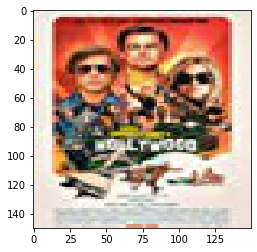

In [ ]:
classes = np.array(df_movie.columns[2:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    #print(df_movie.columns[2:])
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
df = pd.read_csv("movie2019.csv")
df[df['imdbid']== 13]

,imdbid,title,IMDB_Score,genres,poster_link
12,13,Once Upon a Time... in Hollywood (2019),8.0,"Comedy, Drama",https://m.media-amazon.com/images/M/MV5BOTg4ZT...


In [ ]:
for i in range(10):
    isBreak = False
    for j in range(10):
        print(i, j)
        if(j==5):
            isBreak = True
            break
    if(isBreak):
        break